In [1]:
import xarray as xr
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#______LOAD FONCTION______
import sys
sys.path.append('/home/nmpnguyen/')
from imp import reload as rl
import Attn_Bsc_theorie 
rl(Attn_Bsc_theorie)
from Attn_Bsc_theorie import Method1, Method2, Method3, Calibration

In [2]:
import math 
def convert_gpstime(gpstime, date):
    def frmt(decimal_time): # You can rewrite it with 'while' if you wish
        hours = int(decimal_time)#
        minutes = np.round(decimal_time - hours, 4)*60
        seconds = np.round(minutes - int(minutes), 4)*60
        HMS_time = f'{hours}:{int(minutes)}:{int(seconds)}'#"%s:%s:%f"%(hours, int(minutes), int(seconds))
        return HMS_time
    list_HMS_time = list(map(frmt, gpstime))
    list_YMD_HMS = list(map(lambda orig_string: date+' '+orig_string, list_HMS_time))
    pd_YMD_HMS = pd.to_datetime(list_YMD_HMS).strftime('%Y-%m-%d %H:%M:%S')
    return pd_YMD_HMS

In [21]:
#___________ER2__________
er2path = Path('/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5')
#er2 = xr.open_dataset(er2path)

DataProducts = xr.open_dataset(er2path, group='DataProducts')
Nav_Data = xr.open_dataset(er2path, group='Nav_Data')
State = xr.open_dataset(er2path, group='State')

DataProducts

<xarray.Dataset>
Dimensions:                  (phony_dim_0: 2393, phony_dim_1: 1401, phony_dim_2: 1, phony_dim_3: 713)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3
Data variables: (12/45)
    1064_aer_dep             (phony_dim_0, phony_dim_1) float64 ...
    1064_bsc                 (phony_dim_0, phony_dim_1) float64 ...
    1064_bsc_Sa              (phony_dim_0, phony_dim_1) float64 ...
    1064_bsc_cloud_screened  (phony_dim_0, phony_dim_1) float64 ...
    1064_bsr                 (phony_dim_0, phony_dim_1) float64 ...
    1064_bsr_cloud_screened  (phony_dim_0, phony_dim_1) float64 ...
    ...                       ...
    Dust_Mixing_Ratio        (phony_dim_0, phony_dim_1) float64 ...
    Mask_cirrus              (phony_dim_0, phony_dim_3) float64 ...
    WVD_1064_532             (phony_dim_0, phony_dim_1) float64 ...
    WVD_532_355              (phony_dim_0, phony_dim_1) float64 ...
    cloud_top_height         (phony_dim_0, phony_dim_2) float64 ...
    mask_low                 (phony_dim_0, phony_dim_1) float64 ...

In [105]:
er2alt = DataProducts['Altitude'][:].values.flatten() #phony_dim_1: 1389
time = Nav_Data['gps_time']#.values.flatten() phony_dim_7: 1404
print(time)
# time_convert = pd.to_datetime(convert_gpstime(time.values.flatten(), er2path.stem.split("_")[2]))

TT = State['Temperature'] #phony_dim_9: 1404, phony_dim_10: 1389, K
TP = State['Pressure'] #phony_dim_9: 1404, phony_dim_10: 1389, atm
ND = State['Number_Density']
SunAzimuth = Nav_Data['SunAzimuth']
SunElevation = Nav_Data['SunElevation']
print(TP)
# print(time_convert[901], np.argmin(SunElevation.values))


<xarray.DataArray 'gps_time' (phony_dim_7: 1404, phony_dim_8: 1)>
array([[16.506389],
       [16.509583],
       [16.512361],
       ...,
       [20.421944],
       [20.424722],
       [20.4275  ]])
Dimensions without coordinates: phony_dim_7, phony_dim_8
Attributes:
    Description:   gps time 
    Interval (s):  0.5
    Unit:          hr UTC
<xarray.DataArray 'Pressure' (phony_dim_9: 1404, phony_dim_10: 1389)>
[1950156 values with dtype=float64]
Dimensions without coordinates: phony_dim_9, phony_dim_10
Attributes:
    Description:  Pressure
    Unit:         atm


### Vérifier le vol au-dessus du sol/de l'océan et calculer l'evelation du sol

<IPython.core.display.Javascript object>


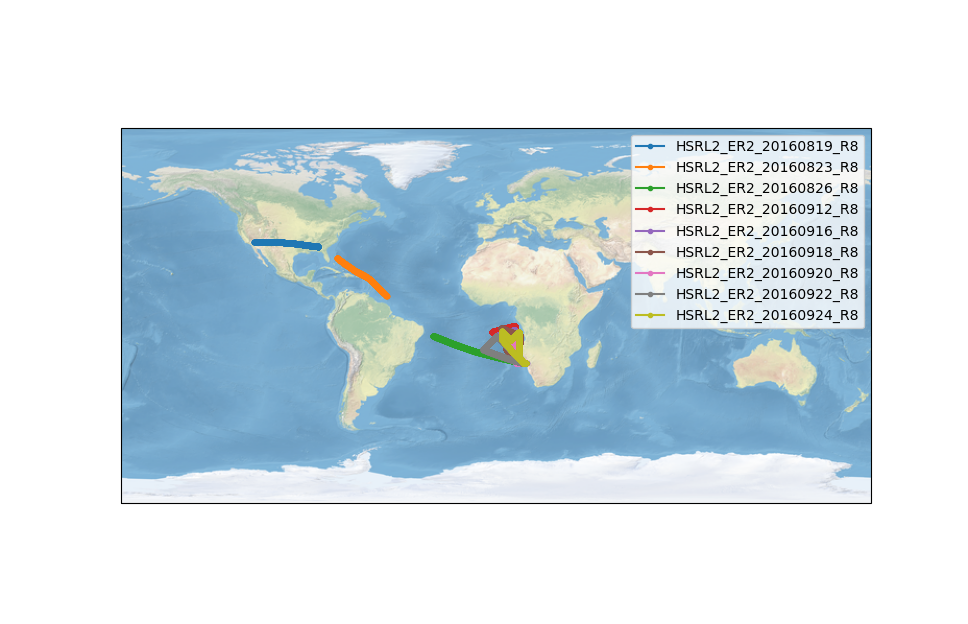

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5


In [34]:
import cartopy.crs as ccrs
%matplotlib notebook
fig, ax = plt.subplots(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5')):
    print(er2path)
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')  
    ax.plot(Nav_Data['gps_lon'].values, Nav_Data['gps_lat'].values, marker='.',
        transform=ccrs.Geodetic(), label=f'{er2path.stem}')

ax.legend()


In [292]:
sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/lpdaac_nasa/e4ftl01.cr.usgs.gov/ASTT/ASTGTM_NC.003/2000.03.01/').glob('ASTGTMV003_*W089*.nc'))

er2path = Path('/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5')
Nav_Data = xr.open_dataset(er2path, group='Nav_Data') 


l1=list(map(lambda n: 'S%2d'%np.abs(n) if n<0 else 'N%2d'%n, Nav_Data.gps_lat.values))
l2=list(map(lambda n: 'W%03d'%np.abs(n) if n<0 else 'O%03d'%n, Nav_Data.gps_lon.values))
ASTGTs = (list(map(lambda m,t: 'ASTGTMV003_'+m+t+'_dem.nc', l1,l2)))
ASTGTs = list(map(lambda f: Path('/homedata/nmpnguyen/ORACLES-ER2/lpdaac_nasa/e4ftl01.cr.usgs.gov/ASTT/ASTGTM_NC.003/2000.03.01/', f), ASTGTs))

def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [304]:

elevs = None
for i in tqdm(range(Nav_Data['gps_time'].shape[0])):
    lats = xr.open_dataset(ASTGTs[i])['lat'].values
    lons = xr.open_dataset(ASTGTs[i])['lon'].values
    idx_lat = find_nearest_index(lats, Nav_Data.gps_lat.values[i])
    idx_lon = find_nearest_index(lons, Nav_Data.gps_lon.values[i])
    if elevs is None:
        elevs = xr.open_dataset(ASTGTs[i])['ASTER_GDEM_DEM'].isel(lat=idx_lat, lon=idx_lon).values
    else:
        elevs = np.hstack([elevs, xr.open_dataset(ASTGTs[i])['ASTER_GDEM_DEM'].isel(lat=idx_lat, lon=idx_lon).values])

100%|██████████| 1404/1404 [00:19<00:00, 71.21it/s]


In [2]:
def get_elevation_from_ASTER(er2_path):
    '''
    - Lister les fichiers ASTER du l'élévation correspondant à chaque couple lat/lon
    - Trouver l'index des coordonnées de chaque mesure correspondant aux données ASTER
    - En déduire la valeur de l'élévation
    '''

    # lire le fichier ER2-HSRL2
    #--------------------------
    NavData = xr.open_dataset(er2_path, group='Nav_Data')
    str_lats = list(map(lambda n: 'S%02d'%np.abs(n) if n<0 else 'N%02d'%n, NavData.gps_lat.values))
    str_longs = list(map(lambda n: 'W%03d'%np.abs(n) if n<0 else 'E%03d'%n, NavData.gps_lon.values))
    # liste des fichiers ASTER
    #-------------------------
    ASTGTfiles = (list(map(lambda m,t: 'ASTGTMV003_'+m+t+'_dem.nc', str_lats, str_longs)))
    ASTGTs = list(map(lambda f: Path('/homedata/nmpnguyen/ORACLES-ER2/lpdaac_nasa/e4ftl01.cr.usgs.gov/ASTT/ASTGTM_NC.003/2000.03.01/', f), ASTGTfiles))
    # retrouver les élévations
    #-------------------------
    def find_nearest_index(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx

    elevations = None
    for i in tqdm(range(NavData['gps_time'].shape[0])):
        try : 
            lats = xr.open_dataset(ASTGTs[i])['lat'].values
            lons = xr.open_dataset(ASTGTs[i])['lon'].values           
            idx_lat = find_nearest_index(lats, NavData.gps_lat.values[i])
            idx_lon = find_nearest_index(lons, NavData.gps_lon.values[i])
            elevation_value = xr.open_dataset(ASTGTs[i])['ASTER_GDEM_DEM'].isel(lat=idx_lat, lon=idx_lon).values
        except FileNotFoundError: 
            elevation_value = np.nan
        if elevations is None:
            elevations = elevation_value
        else:
            elevations = np.hstack([elevations, elevation_value])
    return elevations, ASTGTfiles

In [332]:
Latitudes = None
Longitudes = None
listfiles = None
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5')):
    print(er2path)
    elevs, files = get_elevation_from_ASTER(er2path)
    print(files)
    if listfiles is None:
        listfiles = np.unique(files)
    else:
        listfiles = np.hstack([listfiles, np.unique(files)])
    print()

  0%|          | 6/1404 [00:00<00:27, 51.44it/s]

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5


 33%|███▎      | 542/1651 [00:00<00:00, 5417.45it/s]

['ASTGTMV003_N34W116_dem.nc', 'ASTGTMV003_N34W116_dem.nc', 'ASTGTMV003_N34W116_dem.nc', 'ASTGTMV003_N34W116_dem.nc', 'ASTGTMV003_N34W116_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N34W115_dem.nc', 'ASTGTMV003_N

100%|██████████| 1651/1651 [00:15<00:00, 108.05it/s]


['ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N27W076_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N26W075_dem.nc', 'ASTGTMV003_N

 23%|██▎       | 541/2393 [00:00<00:00, 5400.79it/s]

['ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S09W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W030_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S10W029_dem.nc', 'ASTGTMV003_S

 21%|██        | 535/2552 [00:00<00:00, 5344.46it/s]

['ASTGTMV003_S21E011_dem.nc', 'ASTGTMV003_S21E011_dem.nc', 'ASTGTMV003_S21E011_dem.nc', 'ASTGTMV003_S21E011_dem.nc', 'ASTGTMV003_S20E011_dem.nc', 'ASTGTMV003_S20E011_dem.nc', 'ASTGTMV003_S20E011_dem.nc', 'ASTGTMV003_S20E011_dem.nc', 'ASTGTMV003_S20E011_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S20E010_dem.nc', 'ASTGTMV003_S

 19%|█▊        | 534/2856 [00:00<00:00, 5332.66it/s]

['ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S

  0%|          | 0/2479 [00:00<?, ?it/s]

['ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S22E014_dem.nc', 'ASTGTMV003_S

100%|██████████| 2479/2479 [00:00<00:00, 5115.29it/s]


['ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S

100%|██████████| 2529/2529 [00:00<00:00, 5501.10it/s]


['ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S22E012_dem.nc', 'ASTGTMV003_S

100%|██████████| 2670/2670 [00:00<00:00, 5571.16it/s]

['ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S22E013_dem.nc', 'ASTGTMV003_S

In [331]:
# listfiles
# np.savetxt('/homedata/nmpnguyen/ORACLES-ER2/lpdaac_nasa/list_ASTGTMV003.txt',listfiles, fmt='%s')

In [276]:
    
#     plt.clf()
#     fig, ax = plt.subplots(figsize=(9,5))
#     ax.plot(time_convert, SunAzimuth, label='Azimuth')
#     ax.plot(time_convert, SunElevation, label='Elevation')
#     ax.axhline(0, linestyle='--')
#     ax.axvline(time_convert.values[np.argmin(SunElevation.values)], linestyle='--')
#     ax.legend()
#     plt.savefig(Path(er2path.parent, f'SunElevationAzimuth_{er2path.stem}.png'))

Distribution des SR
===========

In [2]:
import math 
def convert_gpstime(gpstime, date, convert=False):
    def frmt(decimal_time): # You can rewrite it with 'while' if you wish
        hours = int(decimal_time)#
        minutes = np.round(decimal_time - hours, 4)*60
        seconds = np.round(minutes - int(minutes), 4)*60
        HMS_time = f'{hours}:{int(minutes)}:{int(seconds)}'#"%s:%s:%f"%(hours, int(minutes), int(seconds))
        return HMS_time
    if convert==True:
        list_HMS_time = list(map(frmt, gpstime))
        list_YMD_HMS = list(map(lambda orig_string: date+' '+orig_string, list_HMS_time))
        pd_YMD_HMS = pd.to_datetime(list_YMD_HMS).strftime('%Y-%m-%d %H:%M:%S')
    else:
        list_gpstime_str = list(map(lambda n: '%.3f'%n, gpstime))
        list_YMD_HMS = list(map(lambda orig_string: date+' '+orig_string, list_gpstime_str))
        pd_YMD_HMS = list_YMD_HMS
    return pd_YMD_HMS



In [11]:
ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*_R8.h5'))
'''
Define function of SR355/SR532 dataset 
--------------------------------------
'''
allsr355 = None
allsr532 = None 
allZ = None

for filepath in ER2_LISTFILES:
    print(f'FILE: {filepath}')
    data = xr.open_dataset(filepath)
    # convert time format to YYYYMMDD HH.HHH
    #---------------------------------------
    convert_timelist = convert_gpstime(data.time.values, filepath.stem.split('_')[2], convert=False)
    data = data.assign_coords(time = convert_timelist)
    sr = data['calibrated']/data['molecular']
    # remove elements under land elevation
    #-------------------------------------
#     elevs,_ = get_elevation_from_ASTER(Path('/homedata/nmpnguyen/ORACLES-ER2/',filepath.name))
#     mat_alt = np.array([data['altitude'].values]*len(data['time'].values))#np.zeros(len(data['time'].values))
    
    # remove elements under land elevation
    #-------------------------------------    
    DEM_altitude = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/', filepath.name), group='UserInput')['DEM_altitude'].values
    mat_alt = np.array([data['altitude'].values]*len(data['time'].values))
    
    if all(np.isnan(DEM_altitude)):
        print('all elevations are Nan')
        sr355 = sr.sel(wavelength=355).values.ravel()
        sr532 = sr.sel(wavelength=532).values.ravel()
        arr_alt = mat_alt.ravel()
    else:
        print()
        idx_z = mat_alt > (DEM_altitude+100) #mat_alt > (elevs+100).reshape(-1,1)
        sr355 = sr.sel(wavelength=355).values[idx_z]
        sr532 = sr.sel(wavelength=532).values[idx_z]
        arr_alt = mat_alt[idx_z]
#     limitez = (data['altitude'].values)   
    # all scattering ratio
    #---------------------    
    print(f'Resolution vertical: {sr.altitude.values[3]-sr.altitude.values[2]}')
    # print(f'Resolution temporelle: {sr.time.values[3]-sr.time.values[2]}')
    if (allsr532 is None) | (allsr355 is None) : 
        allsr355 = sr355#.isel(altitude=limitez)
        allsr532 = sr532#.isel(altitude=limitez)
        allZ = arr_alt
    else:
#         allsr355 = xr.concat([allsr355, sr.sel(wavelength=355).isel(altitude=limitez), dim='time')
#         allsr532 = xr.concat([allsr532, sr.sel(wavelength=532).isel(altitude=limitez), dim='time')
        allsr355 = np.concatenate((allsr355, sr355))
        allsr532 = np.concatenate((allsr532, sr532))
        allZ = np.concatenate((allZ, arr_alt))

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160819_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160823_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160826_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160912_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160916_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160918_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160920_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160922_R8.h5

Resolution vertical: 14.989599999999996
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL

In [351]:
data = xr.open_dataset(ER2_LISTFILES[0])
elevs,_ = get_elevation_from_ASTER(Path('/homedata/nmpnguyen/ORACLES-ER2/',ER2_LISTFILES[0].name))


100%|██████████| 1404/1404 [08:04<00:00,  2.90it/s] 


In [3]:

def get_params_histogram(srlimite, Xdata, Ydata):
    def remove_NaN_Inf_values(arrayX, arrayY):
        idsX = np.where(~np.isnan(arrayX)&~np.isinf(arrayX))[0]
        idsY = np.where(~np.isnan(arrayY)&~np.isinf(arrayY))[0]
        print(idsX, idsY)
        mask = np.intersect1d(idsX, idsY)
        return mask
    
    from scipy import stats
    from scipy.optimize import curve_fit
    # objective function for best fit
    def objective(x, a, b):
        return a * x + b
    
#     if (~np.isnan(Xdata)|~np.isinf(Xdata)).sum() > (~np.isnan(Ydata)|~np.isinf(Ydata)).sum():
    mask = remove_NaN_Inf_values(Xdata, Ydata)
    print('A')
    H = np.histogram2d(Xdata[mask], Ydata[mask], bins=100, range = srlimite)
    Hprobas = H[0]*100/len(Ydata[mask])
    noNaNpoints = len(Ydata[mask])
    # create the curve fit
    param, param_cov = curve_fit(objective, Xdata[mask], Ydata[mask])
#     elif (~np.isnan(Xdata)|~np.isinf(Xdata)).sum() < (~np.isnan(Ydata)|~np.isinf(Ydata)).sum():
#         mask = (~np.isnan(Ydata)|~np.isinf(Ydata))
#         print('B')
#         H = np.histogram2d(Xdata[mask], Ydata[mask], bins=100, range = srlimite)
#         Hprobas = H[0]*100/len(Ydata[mask])
#         noNaNpoints = len(Ydata[mask])
#         # create the curve fit
#         param, param_cov = curve_fit(objective, Xdata[mask], Ydata[mask])
#     else:
#         print('C')
#         H = np.histogram2d(Xdata[~np.isnan(Xdata)|~np.isinf(Xdata)], Ydata[~np.isnan(Ydata)|~np.isinf(Ydata)], bins=100, range = [[-10, srlimite], [-10, srlimite]]) 
#         Hprobas = H[0]*100/len(Xdata[~np.isnan(Xdata)|~np.isinf(Xdata)])
#         noNaNpoints = len(Xdata[~np.isnan(Xdata)|~np.isinf(Xdata)])
#         # create the curve fit
#         param, param_cov = curve_fit(objective, Xdata[~np.isnan(Xdata)|~np.isinf(Xdata)], Ydata[~np.isnan(Ydata)|~np.isinf(Ydata)])
        
    print(param, param_cov)

    print(f'nombre de points no-NaN: {noNaNpoints}')
    xedges, yedges = np.meshgrid(H[1], H[2])
#     print(slope, intercept)
#     fitLine = slope * allsr532 + intercept
    return xedges, yedges, Hprobas, noNaNpoints

def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


In [68]:
Xxedges, Yyedges, Hprobas, nanpoints = get_params_histogram([[-10,40],[-10,80]], allsr355, allsr532)
# from scipy.optimize import curve_fit
# # objective function for best fit
# def objective(x, a, b):
#     return a * x + b

# curve_fit(objective, allsr355[~np.isnan(allsr355)&~np.isinf(allsr355)], allsr532[~np.isnan(allsr532)&~np.isinf(allsr532)])

[ 536439  536440  536441 ... 9070960 9070961 9070962] [ 438132  438133  438134 ... 9070960 9070961 9070962]
A
[ 5.26295204 -3.67989332] [[ 5.60128837e-07 -6.08205978e-07]
 [-6.08205978e-07  4.23545887e-06]]
nombre de points no-NaN: 5659529


In [18]:
# Hprobas = H[0]*100/len(X532[np.where(~np.isnan(X532))])

ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*_R8.h5'))
# print(f'nombre total des profils: {len(allsr532.time.values)}')
# print(f'nombre total des fichiers: {len(ER2_LISTFILES)}')

[  539316   539317   539318 ... 28036403 28036404 28036405] [  441632   441633   441634 ... 28036403 28036404 28036405]
A
[ 5.74806657 -4.32271715] [[ 1.34303145e-07 -1.44977212e-07]
 [-1.44977212e-07  9.34444007e-07]]
nombre de points no-NaN: 19468689


<IPython.core.display.Javascript object>


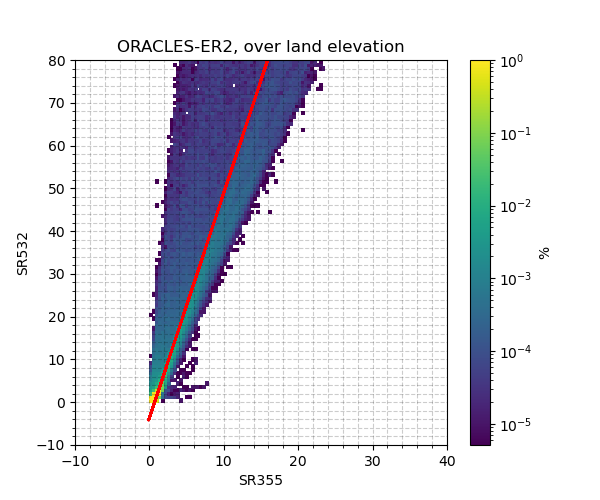

In [72]:
%matplotlib notebook
from matplotlib.colors import LogNorm
from scipy import stats

Xxedges, Yyedges, Hprobas, nanpoints = get_params_histogram([[0,40],[0,80]], allsr355, allsr532)
ff, ax = plt.subplots(figsize=[6,5], nrows=1)
p = ax.pcolormesh(Xxedges, Yyedges, Hprobas.T, norm = LogNorm(vmax=1e0))
# ax.plot(X532[np.where(~np.isnan(X532))], fitLine2, '-.', c='r')
ax.plot(allsr355, 5.26295204*allsr355+(-3.67989332), '--', c='r')
c = plt.colorbar(p, ax=ax, label='%')
ax.set(ylabel='SR532', xlabel='SR355', title= f'ORACLES-ER2, over land elevation')
#        title= f'ORACLES-ER2 \n{nanpoints} points, {len(allsr532.time)} profiles')#\nLinearRegression: {round(slope,5)}x + {round(intercept,3)}
ax.set(xlim=(-10,40), ylim=(-10,80))
plt.minorticks_on()
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)



[  539316   539317   539318 ... 28036403 28036404 28036405] [  441632   441633   441634 ... 28036403 28036404 28036405]


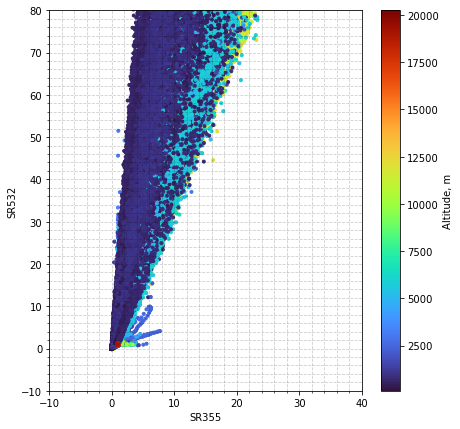

In [15]:
# print((~np.isnan(allsr532)&~np.isinf(allsr532)).sum(), (~np.isnan(allsr355)&~np.isinf(allsr355)).sum())
# mask1 = [~np.isnan(allsr355)&~np.isinf(allsr355)]
mask1 = remove_NaN_Inf_values(allsr355, allsr532)
mask2 = np.where(allsr532/allsr355 > 6)
masks = np.union1d(mask1, mask2)

ff, axins = plt.subplots(figsize=[7,7], nrows=1)
pins = axins.scatter(allsr355[masks], allsr532[masks], c=allZ[masks], cmap='turbo', marker='.')
# axins.plot(X532[np.where(~np.isnan(X532))], fitLine2, '-.', c='r')
cins = plt.colorbar(pins, ax=axins, label='Altitude, m')
axins.set_ylim(-10, 80)
axins.set_xlim(-10, 40)
axins.set(xlabel='SR355', ylabel='SR532')
plt.minorticks_on()
axins.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
axins.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
# plt.savefig(Path('/homedata/nmpnguyen/ORACLES-ER2/',f'distributionSR_100x100_ER2_v2.png'))

[  539316   539317   539318 ... 28036403 28036404 28036405] [  441632   441633   441634 ... 28036403 28036404 28036405]


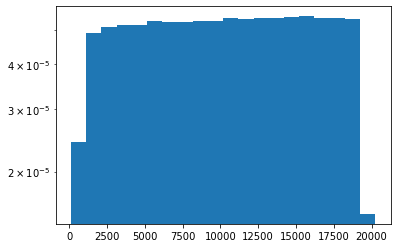

In [25]:
# print((~np.isnan(allsr532)&~np.isinf(allsr532)).sum(), (~np.isnan(allsr355)&~np.isinf(allsr355)).sum())
# mask1 = [~np.isnan(allsr355)&~np.isinf(allsr355)]
mask1 = remove_NaN_Inf_values(allsr355, allsr532)
mask2 = np.where((allsr532/allsr355 > 8) & (allsr532>60) & (allsr532<80))
masks = np.union1d(mask1, mask2)

fig, ax = plt.subplots()
_ = ax.hist(allZ[masks], bins=20, density=True)
plt.yscale('log')

In [4]:
ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*_R8.h5'))
'''
Define function of SR355/SR532 dataset 
--------------------------------------
'''
allsr355 = None
allsr532 = None 

for filepath in ER2_LISTFILES:
    print(f'FILE: {filepath}')
    data = xr.open_dataset(filepath)
    # convert time format to YYYYMMDD HH.HHH
    #---------------------------------------
#     convert_timelist = convert_gpstime(data.time.values, filepath.stem.split('_')[2], convert=False)
#     data = data.assign_coords(time = convert_timelist)
    sr = data['calibrated']/data['molecular']
    # remove elements under land elevation
    #-------------------------------------
    DEM_altitude = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/', filepath.name), group='UserInput')['DEM_altitude'].values
    mat_alt = np.array([data['altitude'].values]*len(data['time'].values))
    idx_z = mat_alt > (DEM_altitude+100)
    sr355 = sr.sel(wavelength=355).values[idx_z]
    sr532 = sr.sel(wavelength=532).values[idx_z]
    arr_alt = mat_alt[idx_z]
    
    if (allsr532 is None) | (allsr355 is None) : 
        allsr355 = sr355#.isel(altitude=limitez)
        allsr532 = sr532#.isel(altitude=limitez)
    else:
#         allsr355 = xr.concat([allsr355, sr.sel(wavelength=355).isel(altitude=limitez), dim='time')
#         allsr532 = xr.concat([allsr532, sr.sel(wavelength=532).isel(altitude=limitez), dim='time')
        allsr355 = np.concatenate((allsr355, sr355))
        allsr532 = np.concatenate((allsr532, sr532))

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160819_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160823_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160826_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160912_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160916_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160918_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160920_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160922_R8.h5
FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160924_R8.h5


FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160819_R8.h5


<IPython.core.display.Javascript object>


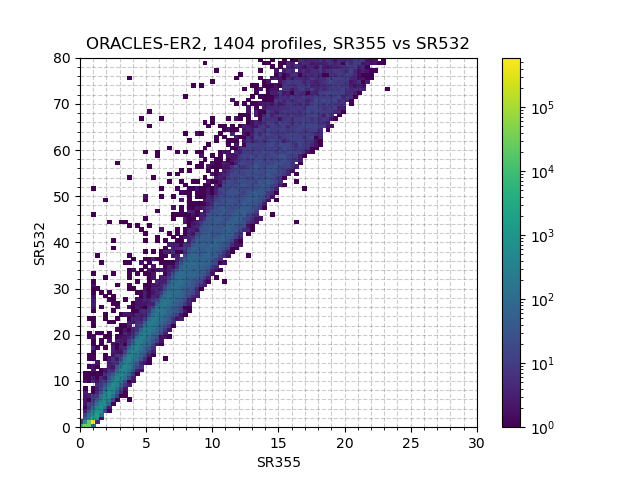

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160823_R8.h5


<IPython.core.display.Javascript object>


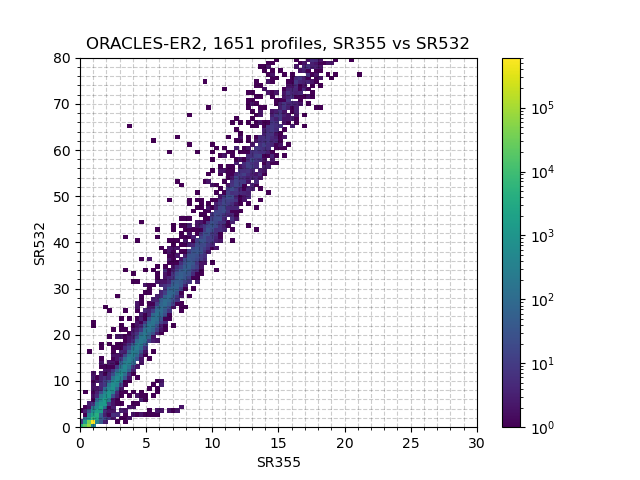

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160826_R8.h5


<IPython.core.display.Javascript object>

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160912_R8.h5


<IPython.core.display.Javascript object>

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160916_R8.h5


<IPython.core.display.Javascript object>

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160918_R8.h5


<IPython.core.display.Javascript object>

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160920_R8.h5


<IPython.core.display.Javascript object>

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160922_R8.h5


<IPython.core.display.Javascript object>

FILE: /homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160924_R8.h5


<IPython.core.display.Javascript object>


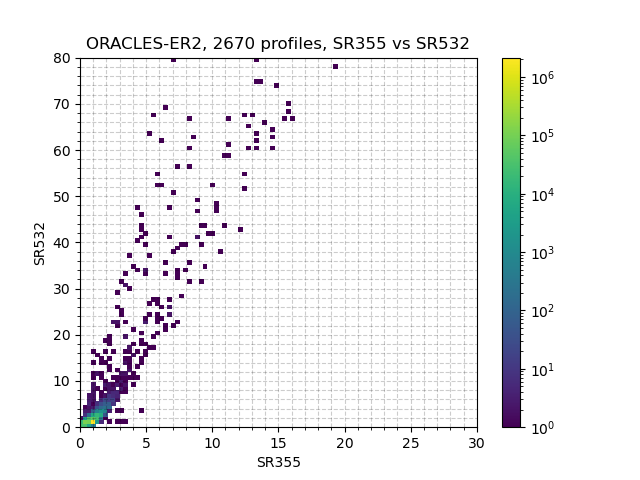

In [61]:
for filepath in ER2_LISTFILES:
    print(f'FILE: {filepath}')
    data = xr.open_dataset(filepath)
#     print(data['altitude'])
#     convert_timelist = convert_gpstime(data.time.values, filepath.stem.split('_')[2], convert=False)
#     data = data.assign_coords(time = convert_timelist)
    limitez = (data['altitude'].values>1200)
    sr = data['calibrated']/data['molecular']
    sr355 = sr.sel(wavelength=355).isel(altitude=limitez)
    sr532 = sr.sel(wavelength=532).isel(altitude=limitez)
    fig, ax=plt.subplots()
#     sr532.plot(y='altitude', x='time', vmin=10, vmax=60, cbar_kwargs={'label':'SR'})
#     plt.savefig(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/quicklookSR/', filepath.stem+'_SR532.png'))
    ax.set_ylim(0,20000)
#     plt.close()
#     plt.clf()
    h = ax.hist2d(sr355.values.ravel(), sr532.values.ravel(),
                 bins = 100, range=[[0,30],[0,80]], norm=LogNorm())
    c = plt.colorbar(h[3], ax=ax)
    ax.set(xlabel='SR355', ylabel='SR532', 
          title=f'ORACLES-ER2, {len(data.time.values)} profiles, SR355 vs SR532')
    plt.minorticks_on()
    ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
    ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
    plt.savefig(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/quicklookSR/', filepath.stem+'sr532_SR355_over1200.png'))

In [5]:
### trouver les profils où les SR532/SR355 grands
#------------------------------------------------
z_seuil = 1000
ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/')
allsr355 = xr.open_dataset(Path(ER2_PATH, f'HSRL2_ER2_allsr355_over{z_seuil}.nc'))
allsr532 = xr.open_dataset(Path(ER2_PATH, f'HSRL2_ER2_allsr532_over{z_seuil}.nc'))


In [6]:
### trouver les profils où les SR532/SR355 grands
#------------------------------------------------ 

time_bug = allsr355.where((allsr532/allsr355 >= 8)&(allsr532>=70)&(allsr532<=81), drop=True)['time'].values
time_bug[80]

# allsr355.where((allsr532>=0)&(allsr532<=6)&(allsr355<=8)&(allsr355>=2), drop=True), allsr532.where((allsr532>=0)&(allsr532<=6)&(allsr355<=8)&(allsr355>=2), drop=True)#['time'].values

'20160916 10.161'

In [3]:
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx



In [78]:
# filepath = sorted(ER2_PATH.glob(f'*{time_bug[80].split(" ")[0]}_R8.h5'))[0]
filepath = Path(ER2_PATH, 'HSRL2_ER2_20160916_R8.h5')
data = xr.open_dataset(filepath)
# limitez = (data['altitude'].values>z_seuil)
sr = data['calibrated']/data['molecular']
sr355 = sr.sel(wavelength=355)
sr532 = sr.sel(wavelength=532)
ts = find_nearest_index(data['time'].values, 10.102)

convert_timelist = convert_gpstime(data.time.values, filepath.stem.split('_')[2], convert=False)
data = data.assign_coords(time = convert_timelist)  
ts = data['time'].values[ts]
# filepath = Path('/homedata/nmpnguyen/ORACLES-ER2/', 'HSRL2_ER2_20160920_R8.h5')
# DataProducts

from matplotlib.gridspec import GridSpec
%matplotlib notebook
fig =plt.figure(figsize=(9,6))
gs = GridSpec(nrows=1, 
    ncols=5, 
    figure=fig, 
    width_ratios= [1, 1, 1,1,1],
    height_ratios=[1],
    wspace=0.3,
    hspace=0.3)

alt_lim = (0,8000)
print('1st Figure')
ax2 = fig.add_subplot(gs[0, 0:2])
(sr532/sr355).plot(y='altitude', x='time', vmin=0, vmax=8, cbar_kwargs={'label':'SR532/SR355', 'orientation':'vertical'}, ax=ax2, 
                   ylim=alt_lim)

print('3nd Figure')
sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
ax1 = fig.add_subplot(gs[0, 3])
sr355.sel(time= ts).plot.line(y='altitude', color='b', label='355', ax=ax1, xscale='log')
sr532.sel(time= ts).plot.line(y='altitude', color='g', label='532', ax=ax1, xscale='log')
# ax1.axhline(1000, linestyle='--', color='k', label='1000 m')
# ax1.axhline(1200, linestyle='--', color='r', label='1200 m')
ax1.set_ylim(alt_lim)
# ax1.set_xlim(-0.5,80)
ax1.legend()
ax1.set(xlabel='SR')

print('4th Figure')
ax3 = fig.add_subplot(gs[0, 4])
(sr532.sel(time= ts)/sr355.sel(time= ts)).plot.line(y='altitude', color='b', label='SR532/SR355', ax=ax3)
ax3.set_ylim(alt_lim)
ax3.set(xlabel='SR532/SR355')

print('2th Figure')
ax4 = fig.add_subplot(gs[0, 2])
data['calibrated'].sel(wavelength=355, time= ts).plot.line(y='altitude', color='b', label='ATB355', ax=ax4, xscale='log')
data['calibrated'].sel(wavelength=532, time= ts).plot.line(y='altitude', color='g', label='ATB532', ax=ax4, xscale='log')
ax4.legend()
ax4.set_ylim(alt_lim)
ax4.set(xlabel='ATB')


<IPython.core.display.Javascript object>

1st Figure
3nd Figure
4th Figure
2th Figure


[Text(0.5, 0, 'ATB')]

In [31]:
selectdays = ['20160920', '20160922']
allsr355 = None
allsr532 = None

fig, axs = plt.subplots(nrows=2)
for i, ax in enumerate(axs.flat):
    data = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/',f'HSRL2_ER2_{selectdays[i]}_R8.h5'))
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
    (sr532/sr355).plot(y='altitude', x='time', vmin=1, vmax=6, ax=ax, ylim=(0,12000), cbar_kwargs={'label':'SR532/SR355'})
    ax.set(xlabel='Hour', ylabel='Altitude, m', title=f'{selectdays[i]}')
#     if (allsr355 is None) | (allsr532 is None) : 
#         allsr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
#         allsr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
#     else:
#         allsr355 = xr.concat([allsr355, (data['calibrated']/data['molecular']).sel(wavelength=355)], dim='time')
#         allsr532 = xr.concat([allsr532, (data['calibrated']/data['molecular']).sel(wavelength=532)], dim='time')

<IPython.core.display.Javascript object>

[ 334102  334103  334104 ... 6784555 6784556 6784557] [ 334102  334103  334104 ... 6784555 6784556 6784557]
A
[ 6.74107891 -4.6991805 ] [[ 2.24401990e-06 -2.12702978e-06]
 [-2.12702978e-06  6.54843827e-06]]
nombre de points no-NaN: 4907446


<IPython.core.display.Javascript object>


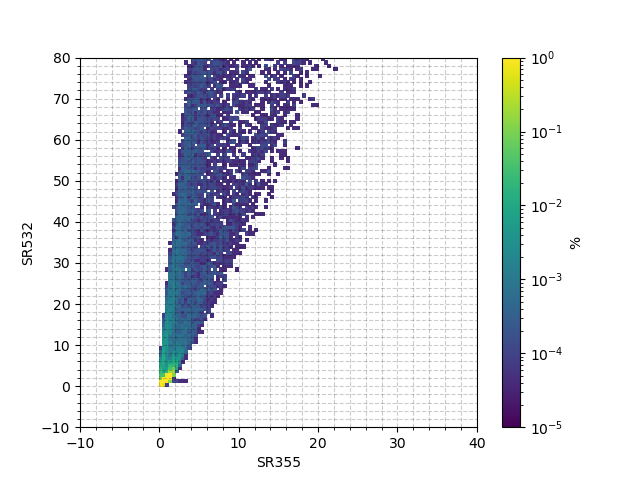

In [25]:
Xxedges, Yyedges, Probas_cloud, _ = get_params_histogram([[0,40], [0,80]], allsr355.values.ravel(), allsr532.values.ravel())
%matplotlib notebook
fig, ax = plt.subplots()
plt.minorticks_on()
p = ax.pcolormesh(Xxedges, Yyedges, Probas_cloud.T, norm = LogNorm(vmax=1e0, vmin=1e-5))
# ax.plot(X532[np.where(~np.isnan(X532))], fitLine2, '-.', c='r')
c = plt.colorbar(p, ax=ax, label='%')
ax.set(ylabel='SR532', xlabel='SR355') 
#        title= f'ER2 - CLOUDS,{len(allclouds)} profiles')#\nLinearRegression: {round(slope,5)}x + {round(intercept,3)}
ax.set(xlim=(-10,40), ylim=(-10,80))
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

In [67]:
print(len(time_bug))
fig, ax=plt.subplots()
allsr355.sel(time= time_bug[5:10]).plot.line(y='altitude', color='b', label='355')
allsr532.sel(time= time_bug[5:10]).plot.line(y='altitude', color='g', label='532', linestyle='--')
ax.set_ylim(0,20000)
ax.set_xlim(0,80)

47


<IPython.core.display.Javascript object>

(0.0, 80.0)

In [9]:
# Séparer Jour/Nuit avec Angle zenith 
#------------------------------------

list_SunElevation = None
list_SunAzimuth = None
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('HSRL2_ER2*_R8.h5')):
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')
    time = Nav_Data['gps_time'][:]#.values.flatten() phony_dim_7: 1404
    time_convert = pd.to_datetime(convert_gpstime(time.values.flatten(), er2path.stem.split("_")[2]))
    SunAzimuth = Nav_Data['SunAzimuth'].values
    SunElevation = Nav_Data['SunElevation'].values
    print(SunAzimuth.shape, SunElevation.shape)
    if list_SunAzimuth is None:
        list_SunAzimuth = SunAzimuth
        list_SunElevation = SunElevation
    else:
        list_SunAzimuth = np.concatenate([list_SunAzimuth, SunAzimuth], axis=0)
        list_SunElevation = np.concatenate([list_SunElevation, SunElevation], axis=0)

(1404, 1) (1404, 1)
(1651, 1) (1651, 1)
(2360, 1) (2360, 1)
(2393, 1) (2393, 1)
(2552, 1) (2552, 1)
(2856, 1) (2856, 1)
(2479, 1) (2479, 1)
(2529, 1) (2529, 1)
(2670, 1) (2670, 1)


In [10]:
a=np.where(list_SunElevation.flatten()>0)[0]
srday355 = allsr355.isel(time=a)#['__xarray_dataarray_variable__']
srday532 = allsr532.isel(time=a)
a=np.where(list_SunElevation.flatten()<0)[0]
srnight355 = allsr355.isel(time=a)
srnight532 = allsr532.isel(time=a)

In [11]:
srnight355, srnight532

(<xarray.DataArray (time: 1651, altitude: 1982)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])
 Coordinates:
   * altitude    (altitude) float64 1.004e+03 1.019e+03 ... 2.084e+04 2.085e+04
   * time        (time) object '2016-08-23 01:55:32' ... '2016-08-23 06:35:51'
     wavelength  int64 355,
 <xarray.DataArray (time: 1651, altitude: 1982)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])
 Coordinates:
   * altitude    (altitude) float64 1.004e+03 1.019e+03 ... 2.084e+04 2.085e+04
   * time        (time) object '2016-08

B


<ipython-input-6-9eb3f14cc31a>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  H = np.histogram2d(X532[mask], Y355[mask], bins=100, range = [[-10, srlimite], [-10, srlimite]])
<ipython-input-6-9eb3f14cc31a>:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Hprobas = H[0]*100/len(Y355[mask])
<ipython-input-6-9eb3f14cc31a>:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, whi

nombre de points no-NaN: 18998775
B
nombre de points no-NaN: 823513


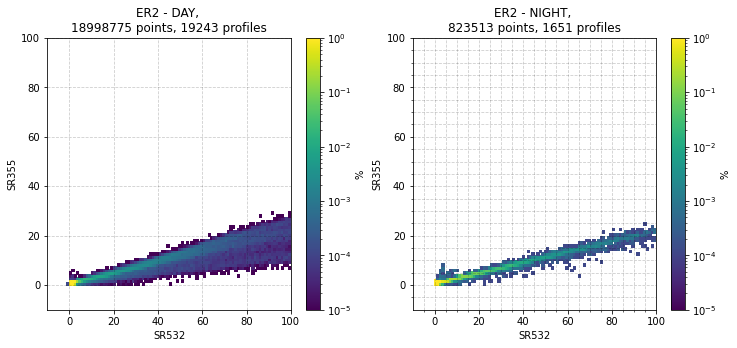

In [13]:
from matplotlib.colors import LogNorm
from scipy import stats

ff, (ax,ax2) = plt.subplots(figsize=[12,5], ncols=2)
plt.minorticks_on()
'''
DAY
'''
Xxedges, Yyedges, probas, points = get_params_histogram(sr_limite, srday532.values.ravel(), srday355.values.ravel())
p = ax.pcolormesh(Xxedges, Yyedges, probas.T, norm = LogNorm(vmax=1e0, vmin=1e-5))
# ax.plot(X532[np.where(~np.isnan(X532))], fitLine2, '-.', c='r')
c = plt.colorbar(p, ax=ax, label='%')
ax.set(xlabel='SR532', ylabel='SR355', 
       title= f'ER2 - DAY, \n{points} points, {len(srday532.time)} profiles')#\nLinearRegression: {round(slope,5)}x + {round(intercept,3)}
ax.set(xlim=(-10,sr_limite), ylim=(-10,sr_limite))
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
'''
NIGHT
'''
Xxedges, Yyedges, probas, points = get_params_histogram(sr_limite, srnight532.values.ravel(), srnight355.values.ravel())
p = ax2.pcolormesh(Xxedges, Yyedges, probas.T, norm = LogNorm(vmax=1e0, vmin=1e-5))
# ax.plot(X532[np.where(~np.isnan(X532))], fitLine2, '-.', c='r')
c = plt.colorbar(p, ax=ax2, label='%')
ax2.set(xlabel='SR532', ylabel='SR355', 
       title= f'ER2 - NIGHT, \n{points} points, {len(srnight355.time)} profiles')#\nLinearRegression: {round(slope,5)}x + {round(intercept,3)}
ax2.set(xlim=(-10,sr_limite), ylim=(-10,sr_limite))
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

### Check clouds observations

<IPython.core.display.Javascript object>


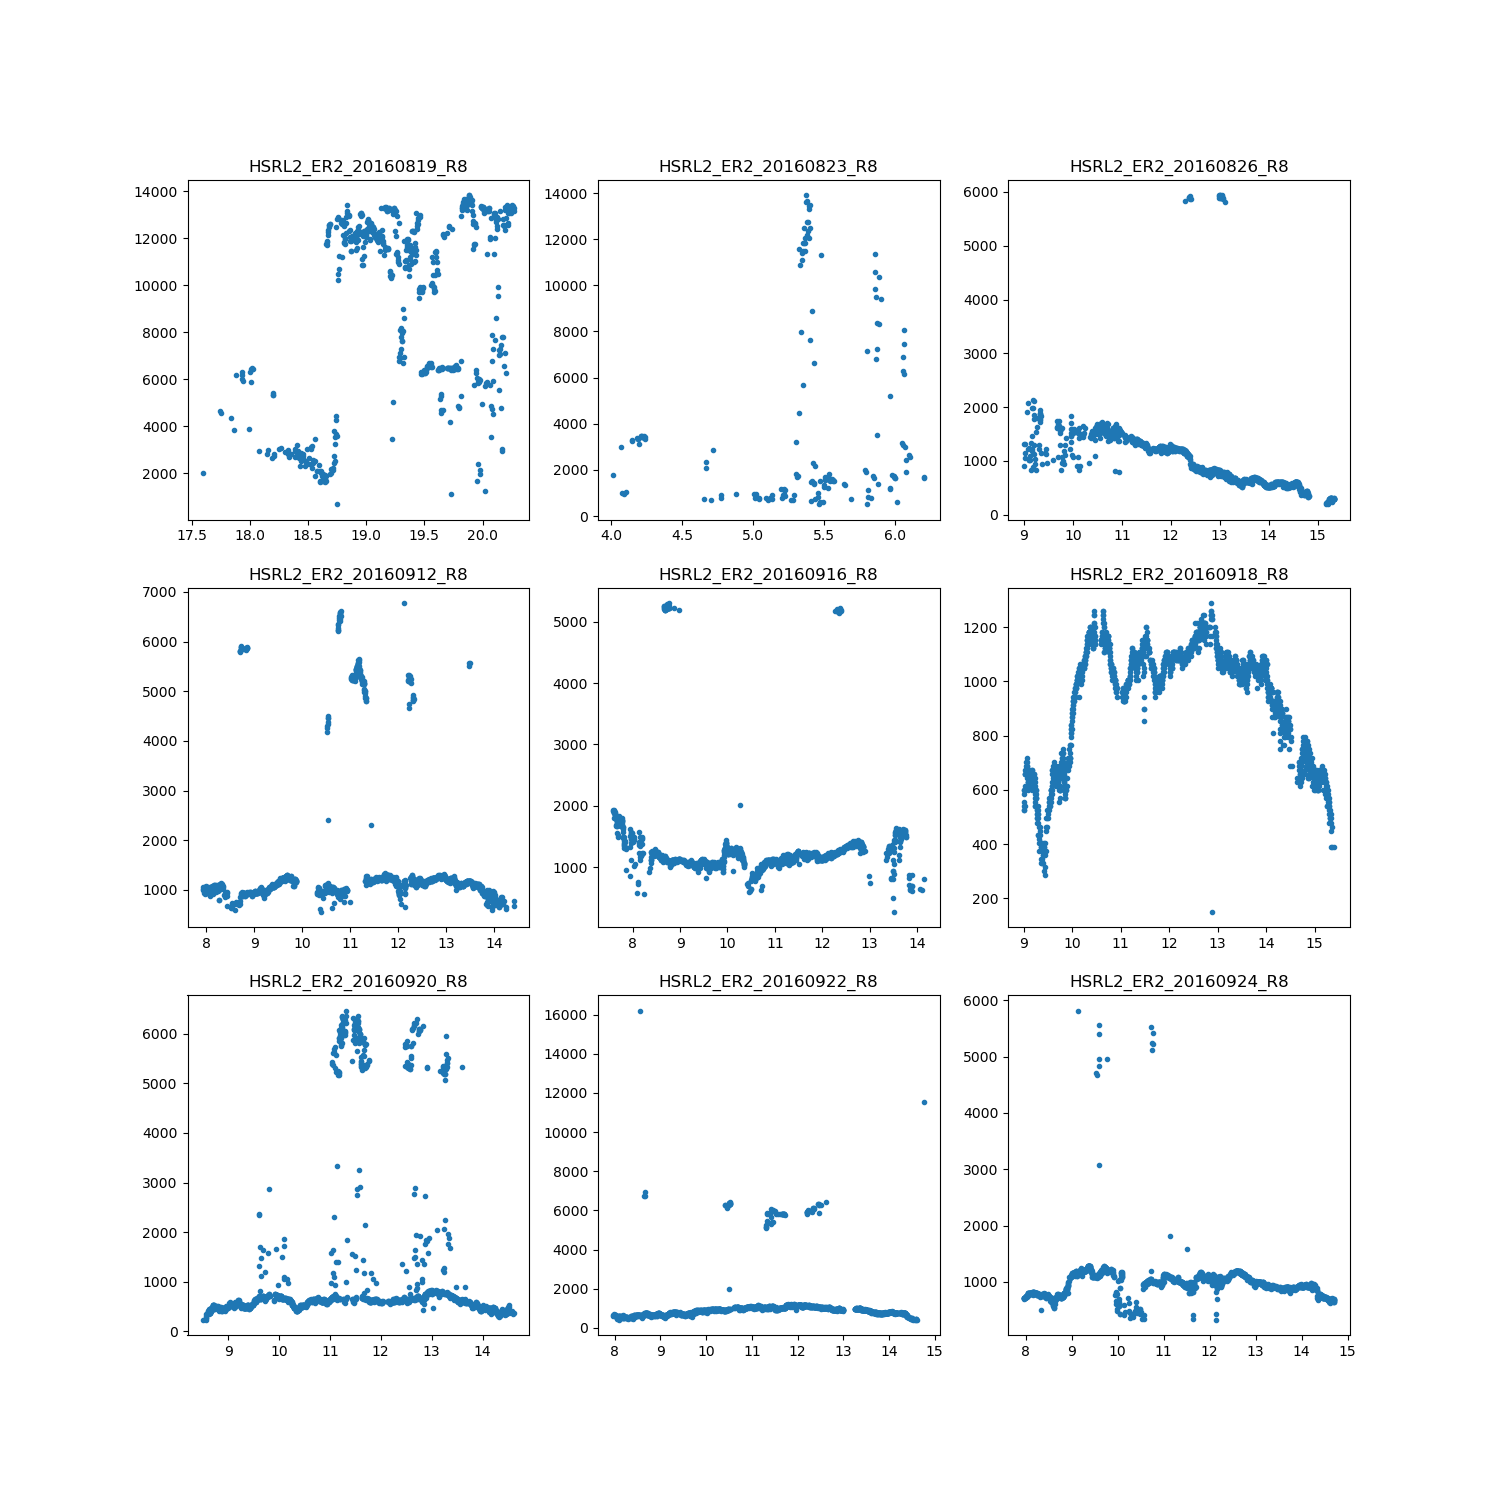

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5


In [76]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
for er2path, (i, ax) in zip(sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5')), enumerate(axs.flat)):
    print(er2path)
    # cloud_top_height
    #-----------------
    DataProducts = xr.open_dataset(er2path, group = 'DataProducts')
    Nav_Data = xr.open_dataset(er2path, group = 'Nav_Data')
    ax.scatter(Nav_Data['gps_time'].values, DataProducts['cloud_top_height'].values, marker='.')
    ax.set(title = f'{er2path.stem}')
    
#     cloud_top_height = np.where(~np.isnan(DataProducts['cloud_top_height'].values))[0]
                      
#     data = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
#     sr = data['calibrated']/data['molecular'] 
#     sr.sel(wavelength=355).plot(y='altitude', x='time', vmin=1, vmax=20)
#     ax.plot(data['time'].values[cloud_top_height], [500]*len(data['time'].values[cloud_top_height]), color='r', marker='.')
    

In [4]:
# ER2_LISTFILES = sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5'))


def get_data_AboveBelow_cloud_top_height(data_name, CloudTopHeight, options):
    '''
    this module allow to get only data above cloud top height
    '''
    #1. Input Cloud top height, m
    #-----------------------
    dataset = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/',data_name))
    #2. check shape of Cloud top height
    #----------------------------------
    if len(CloudTopHeight) != 2: 
        CloudTopHeight_2d = np.tile(CloudTopHeight, (len(dataset['altitude'].values))) #CloudTopHeight.reshape(-1, 1)
    
    #3. create mask with cloud top height
    #------------------------------------
    matrice_altitude = np.tile(dataset['altitude'].values, (len(dataset['time'].values),1))
    print(matrice_altitude[matrice_altitude < (CloudTopHeight_2d+200)])
    '''
    below: mask only data < CloudTopHeight
    above: mask only data > CloudTopHeight
    outside: mask only data where CloudTopHeight values are NaN
    inside: mask only data where CloudTopHeight values are not NaN
        --> 1  
    '''
    if options == 'below':
        matrice_mask = np.where(matrice_altitude < (CloudTopHeight_2d+200), matrice_altitude, 1)
        dataset.coords['mask_cth'] = (('time', 'altitude'), matrice_mask)
        return dataset       
    elif options == 'above':
        matrice_mask = np.where(matrice_altitude > (CloudTopHeight_2d+200), matrice_altitude, 1)
        dataset.coords['mask_cth'] = (('time', 'altitude'), matrice_mask)
        return dataset
    elif options == 'outside':     
#         print(np.where(np.isnan(CloudTopHeight))[0])
        matrice_mask = dataset.isel(time= np.where(np.isnan(CloudTopHeight))[0])#np.where(~np.isnan(CloudTopHeight), matrice_altitude, 1)
        return matrice_mask
    else:
        matrice_mask = dataset.isel(time= np.where(~np.isnan(CloudTopHeight))[0])
        return matrice_mask
    
#     dataset.coords['mask_cth'] = (('time', 'altitude'), matrice_mask)
#     return dataset



In [12]:
from matplotlib.colors import LogNorm 

ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*R8.h5'))
allsr355_below = None
allsr532_below = None
data_below = None

# fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
# for filepath, (i,ax) in zip(ER2_LISTFILES, enumerate(axs.flat)):

for filepath in ER2_LISTFILES[-3:]:
    print(filepath)
    DataProducts = xr.open_dataset(filepath, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values

    data_below = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', filepath.name))
       
    mask_cth= np.zeros_like(data_below['calibrated'].sel(wavelength=355).values)
    for i, cth in enumerate(cloud_top_height):
        if np.isnan(cth):
#             pass
            mask_cth[i,:] = 1
        else:
            limZ = np.where(data_below['altitude'].values > cth+200)[0]
            mask_cth[i, limZ] = 1
#     data_below = get_data_AboveBelow_cloud_top_height(filepath.name, cloud_top_height, 'above')
    
    data_below.coords['mask_cth'] = (('time', 'altitude'), mask_cth)
    print(np.where(data_below['mask_cth'] == 1))
    
    sr355_below = (data_below['calibrated']/data_below['molecular']).sel(wavelength=355).where(data_below.mask_cth==1)
    sr532_below = (data_below['calibrated']/data_below['molecular']).sel(wavelength=532).where(data_below.mask_cth==1)
    sr355 = sr355_below.values
    sr532 = sr532_below.values

    
    if (sr355_below.shape[0] == 0):
        pass
    else:
        figs, (ax0, ax1, ax) = plt.subplots(ncols=3, figsize=(14,4))
        # col 2
        pcm = ax1.pcolormesh(data_below.time.values, data_below.altitude.values, sr532.T, norm=LogNorm(vmin=1e-1, vmax=1e2), cmap='turbo', shading='nearest')
        plt.colorbar(pcm, ax=ax1, label='SR532')
        # col 1
        pcm = ax0.pcolormesh(data_below.time.values, data_below.altitude.values, (sr532/sr355).T, vmin=0, vmax=5, cmap='turbo', shading='nearest')
        plt.colorbar(pcm, ax=ax0, label='SR532/SR355')
        # col 3
        xxegde , yyegde, counts, _ = get_params_histogram([[0,40],[0,80]], sr355.ravel(), sr532.ravel())
        petit = ax.pcolormesh(xxegde, yyegde, counts.T, norm=LogNorm(vmin=1e-4))
        colorpetit = plt.colorbar(petit, ax=ax, label='%')
        ax.set(xlabel='355', ylabel='532', title=f'{filepath.stem}, \n{cloud_top_height[~np.isnan(cloud_top_height)].shape[0]} profils')

#     if (allsr355_below is None) | (allsr532_below is None) :
#         allsr355_below = sr355.ravel()
#         allsr532_below = sr532.ravel()
#     else: 
#         allsr355_below = np.concatenate([allsr355_below, sr355.ravel()])
#         allsr532_below = np.concatenate([allsr532_below, sr532.ravel()])

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
(array([   0,    0,    0, ..., 1403, 1403, 1403]), array([   0,    1,    2, ..., 1386, 1387, 1388]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
(array([   0,    0,    0, ..., 1650, 1650, 1650]), array([   0,    1,    2, ..., 1388, 1389, 1390]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
(array([   0,    0,    0, ..., 2359, 2359, 2359]), array([   0,    1,    2, ..., 1409, 1410, 1411]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
(array([   0,    0,    0, ..., 2392, 2392, 2392]), array([   0,    1,    2, ..., 1398, 1399, 1400]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
(array([   0,    0,    0, ..., 2551, 2551, 2551]), array([   0,    1,    2, ..., 1376, 1377, 1378]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
(array([   0,    0,    0, ..., 2855, 2855, 2855]), array([   0,    1,    2, ..., 1349, 1350, 1351]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185

<ipython-input-61-badfb8789b35>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax0.pcolormesh(data_outside.time.values, data_outside.altitude.values, (sr532/sr355).T, vmin=0, vmax=5, cmap='turbo')


[594660 594661 594662 ... 991696 991697 991698] [486334 486335 486336 ... 991696 991697 991698]
A
[ 8.33294163 -7.32639189] [[ 2.57881994e-05 -2.65078504e-05]
 [-2.65078504e-05  5.37027647e-05]]
nombre de points no-NaN: 267095
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
[   0    1    2 ... 1648 1649 1650]
[1015452 1015453 1015454 ... 1870837 1870838 1870839] [1014063 1014064 1014065 ... 1870837 1870838 1870839]
A
[ 4.58452703 -3.35672999] [[ 1.38098034e-06 -1.43656254e-06]
 [-1.43656254e-06  2.11520884e-06]]
nombre de points no-NaN: 691169
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
[   0    1    2    3    4    5    6    7    8    9   10   11   13   15
   16   17   18   19   20   21   22   26   27   28   29   30   31   32
   33   34   35   36   37   38   39   42   44   45   46   47   48   49
   50   51   52   57   58   60   61   62   63   64   65   66   67   70
   71   72   74   78   79   80   81   90   91   92   93   94   95   97
   98  100  101  103  104  10

[ 57463  57464  57465 ... 993253 993254 993255] [  56062   56063   56064 ... 1000257 1000258 1000259]
A
[ 3.98728718 -2.58443461] [[ 1.55982272e-05 -1.45417724e-05]
 [-1.45417724e-05  1.60375563e-05]]
nombre de points no-NaN: 557593
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   74   75
   76  104  105  106  107  108  129  142  143  144  145  146  148  150
  151  152  153  154  155  156  157  158  159  160  161  162  163  164
  165  166  167  168  169  170  171  172  173  174  175  176  177  179
  180  181  206  207  210  211  214  215  217  218  219  220  221  222
  223  224  225  226  227  228  229  230  231  232  233  235  236  237
  238  239  240  241  242  245  247  249  256  259  260  261  262  265


[ 462406  462407  462408 ... 1105890 1105891 1105892] [ 462408  462409  462410 ... 1107242 1107243 1107244]
A
[ 5.19924764 -4.21323446] [[ 2.20954036e-06 -2.27490136e-06]
 [-2.27490136e-06  3.03716614e-06]]
nombre de points no-NaN: 376364
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138

[179203 179204 179205 ... 559702 559703 559704] [179205 179206 179207 ... 559702 559703 559704]
A
[ 2.14643916 -0.88196328] [[ 3.35260466e-05 -3.11751769e-05]
 [-3.11751769e-05  3.23605230e-05]]
nombre de points no-NaN: 244555


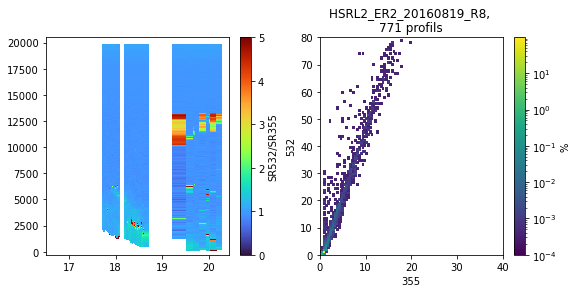

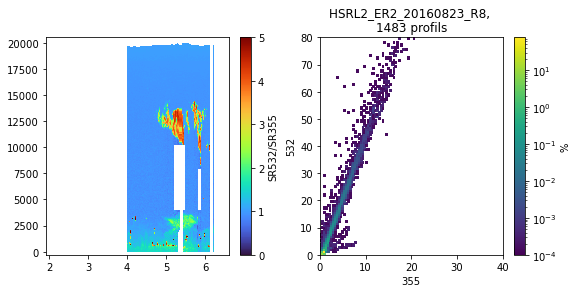

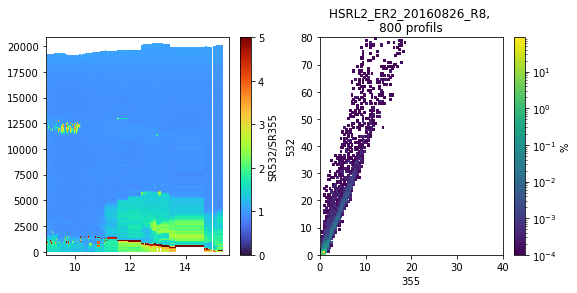

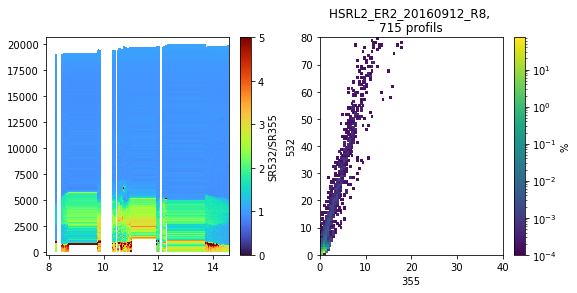

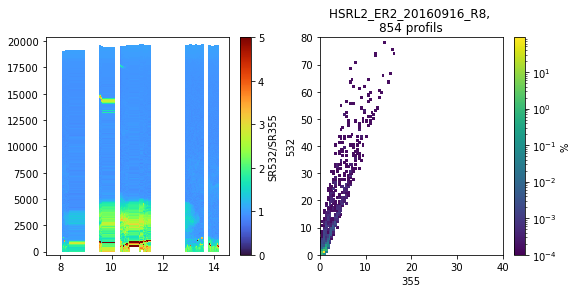

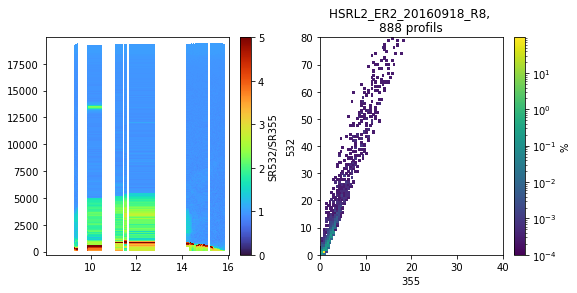

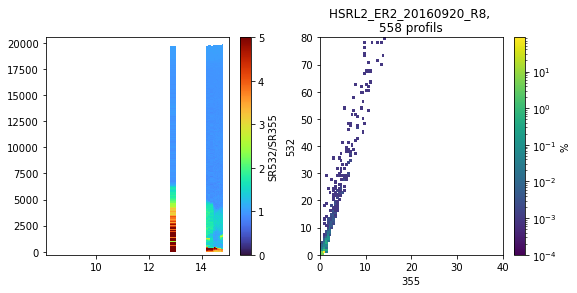

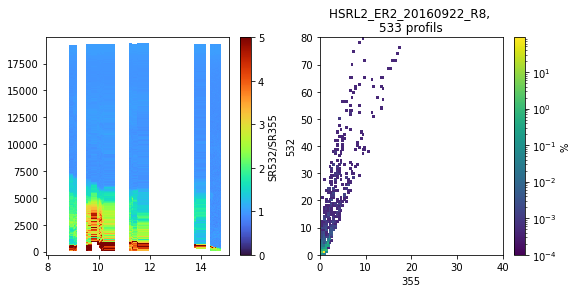

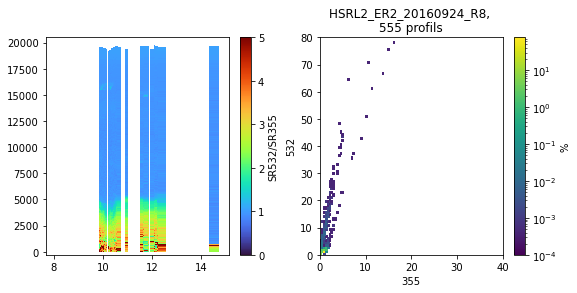

In [61]:
from matplotlib.colors import LogNorm 

ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*R8.h5'))
allsr355_Nan = None
allsr532_Nan = None
# fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

# for filepath, (i,ax) in zip(ER2_LISTFILES, enumerate(axs.flat)):
for filepath in ER2_LISTFILES:
    print(filepath)
    DataProducts = xr.open_dataset(filepath, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values
    
    data_outside = get_data_AboveBelow_cloud_top_height(filepath.name, cloud_top_height, 'outside')
    sr355 = (data_outside['calibrated']/data_outside['molecular']).sel(wavelength=355).values
    sr532 = (data_outside['calibrated']/data_outside['molecular']).sel(wavelength=532).values
    
    figs, (ax0, ax) = plt.subplots(ncols=2, figsize=(9,4))
    pcm = ax0.pcolormesh(data_outside.time.values, data_outside.altitude.values, (sr532/sr355).T, vmin=0, vmax=5, cmap='turbo')
    plt.colorbar(pcm, ax=ax0, label='SR532/SR355')
    xxegde , yyegde, counts, _ = get_params_histogram([[0,40],[0,80]], sr355.ravel(), sr532.ravel())
    petit = ax.pcolormesh(xxegde, yyegde, counts.T, norm=LogNorm(vmin=1e-4))
    colorpetit = plt.colorbar(petit, ax=ax, label='%')
    ax.set(xlabel='355', ylabel='532', title=f'{filepath.stem}, \n{sr355.shape[0]} profils')
    
    if (allsr355_Nan is None) | (allsr532_Nan is None) :
        allsr355_Nan = sr355.ravel()
        allsr532_Nan = sr532.ravel()
    else: 
        allsr355_Nan = np.concatenate([allsr355_Nan, sr355.ravel()])
        allsr532_Nan = np.concatenate([allsr532_Nan, sr532.ravel()])

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
(2360, 1)


<ipython-input-9-03e299c9605b>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax0.pcolormesh(data_above.time.values, data_above.altitude.values, sr532.T, vmin=0, vmax=6, cmap='turbo')


/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
(2393, 1)


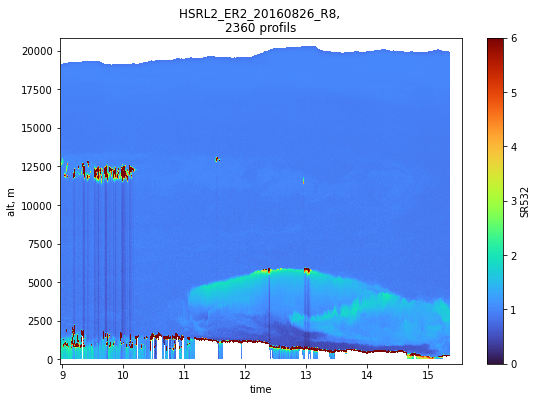

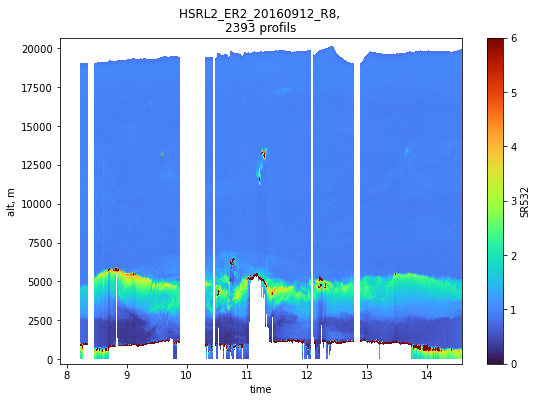

In [9]:
from matplotlib.colors import LogNorm 

ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*R8.h5'))
allsr355_above = None
allsr532_above = None
# fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

# for filepath, (i,ax) in zip(ER2_LISTFILES, enumerate(axs.flat)):
for filepath in ER2_LISTFILES[2:4]:
    print(filepath)
    DataProducts = xr.open_dataset(filepath, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values
    print(cloud_top_height.shape)
    data_above = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', filepath.name))
#     data_above = get_data_AboveBelow_cloud_top_height(filepath.name, cloud_top_height, 'above')

    sr355_above = (data_above['calibrated']/data_above['molecular']).sel(wavelength=355)#.where(data_above.mask_cth!=1)
    sr532_above = (data_above['calibrated']/data_above['molecular']).sel(wavelength=532)#.where(data_above.mask_cth!=1)

    sr355 = sr355_above.values#np.concatenate([sr355_above, sr355_all], axis=1)
    sr532 = sr532_above.values#np.concatenate([sr532_above, sr532_all], axis=1)
    
    figs, ax0 = plt.subplots(figsize=(9,6))
    pcm = ax0.pcolormesh(data_above.time.values, data_above.altitude.values, sr532.T, vmin=0, vmax=6, cmap='turbo')
    plt.colorbar(pcm, ax=ax0, label='SR532')
    ax0.scatter(data_above.time.values, cloud_top_height, marker='.', color='k')
    ax0.set(xlabel='time', ylabel='alt, m', title=f'{filepath.stem}, \n{data_above.time.values.shape[0]} profils')

#     xxegde , yyegde, counts, _ = get_params_histogram([[0,40],[0,80]], sr355.ravel(), sr532.ravel())
#     petit = ax.pcolormesh(xxegde, yyegde, counts.T, norm=LogNorm(vmin=1e-4))
#     colorpetit = plt.colorbar(petit, ax=ax, label='%')
#     ax.set(xlabel='355', ylabel='532', title=f'{filepath.stem}, \n{cloud_top_height[~np.isnan(cloud_top_height)].shape[0]} profils')
    
    if (allsr355_above is None) | (allsr532_above is None) :
        allsr355_above = sr355.ravel()
        allsr532_above = sr532.ravel()
    else: 
        allsr355_above = np.concatenate([allsr355_above, sr355.ravel()])
        allsr532_above = np.concatenate([allsr532_above, sr532.ravel()])

[  607337   607338   607339 ... 28674203 28674204 28674205] [  533545   533546   533547 ... 28674203 28674204 28674205]
A
[ 3.45701423 -2.23398068] [[ 2.86702806e-07 -2.76248130e-07]
 [-2.76248130e-07  3.05225639e-07]]
nombre de points no-NaN: 15112724
[ 594660  594661  594662 ... 9699850 9699851 9699852] [ 486334  486335  486336 ... 9699850 9699851 9699852]
A
[ 5.52985887 -4.31192578] [[ 1.83209244e-06 -1.81816565e-06]
 [-1.81816565e-06  2.31219991e-06]]
nombre de points no-NaN: 3878165


[Text(0.5, 0, 'SR 355'),
 Text(0, 0.5, 'SR 355'),
 Text(0.5, 1.0, 'histo. SR532/SR355 data without CTH')]

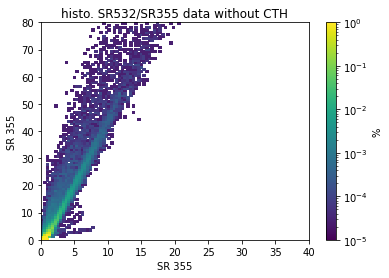

In [80]:
##histo. all sr above 200m cloud top height

Xx, Yy, histo_above, _ = get_params_histogram([[0,40], [0,80]], allsr355_above, allsr532_above)
fig, axabove = plt.subplots()
pcmabove = axabove.pcolormesh(Xx, Yy, histo_above.T, norm=LogNorm(vmin=1e-5, vmax=1e0))
plt.colorbar(pcmabove, ax=axabove, label='%')
axabove.set(xlabel='SR 355', ylabel='SR 355', title = 'histo. SR532/SR355 data above CTH+200m')


##histo. all sr where cloud top height is NaN

Xx, Yy, histo_above, _ = get_params_histogram([[0,40], [0,80]], allsr355_Nan, allsr532_Nan)
fig, axabove = plt.subplots()
pcmabove = axabove.pcolormesh(Xx, Yy, histo_above.T, norm=LogNorm(vmin=1e-5, vmax=1e0))
plt.colorbar(pcmabove, ax=axabove, label='%')
axabove.set(xlabel='SR 355', ylabel='SR 355', title = 'histo. SR532/SR355 data without CTH')

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
(array([   0,    1,    2, ..., 1386, 1387, 1388]),)


<ipython-input-52-cb9d2c4feee3>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax0.pcolormesh(data_outside.time.values, data_outside.altitude.values, (sr532/sr355).T, vmin=0, vmax=5, cmap='turbo')


[ 596049  596050  596051 ... 1870933 1870934 1870935] [ 486334  486335  486336 ... 1870933 1870934 1870935]
A
[ 4.55554403 -3.41559513] [[ 7.03003913e-07 -1.17250866e-06]
 [-1.17250866e-06  1.91958288e-05]]
nombre de points no-NaN: 767380
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
(array([   0,    1,    2, ..., 1388, 1389, 1390]),)
[1015452 1015453 1015454 ... 1934819 1934820 1934821] [1014063 1014064 1014065 ... 1934819 1934820 1934821]
A
[ 4.83107563 -3.60355103] [[ 4.76560532e-07 -5.28544671e-07]
 [-5.28544671e-07  1.55193200e-06]]
nombre de points no-NaN: 740418
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
(array([   0,    1,    2, ..., 1409, 1410, 1411]),)
[  16966   16967   16968 ... 1993699 1993700 1993701] [  15556   15557   15558 ... 1993699 1993700 1993701]
A
[ 5.66470762 -4.52090025] [[ 5.69071179e-07 -6.33783339e-07]
 [-6.33783339e-07  4.09367292e-06]]
nombre de points no-NaN: 1616568
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
(array(

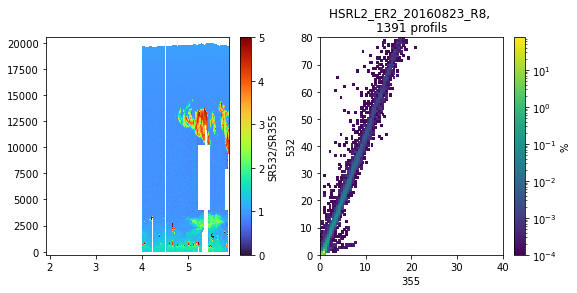

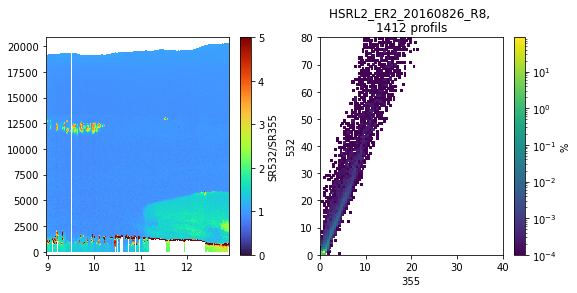

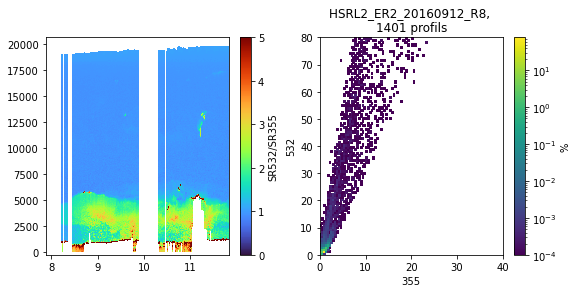

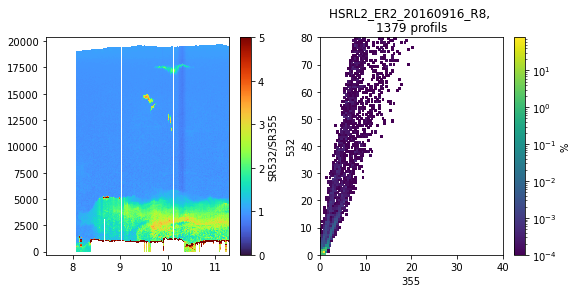

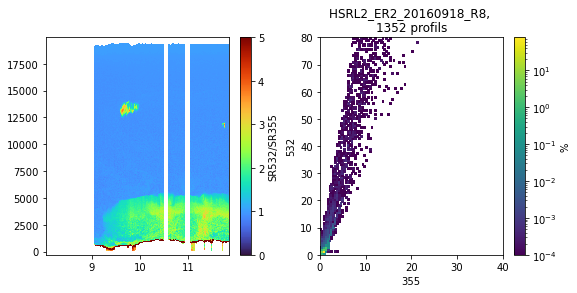

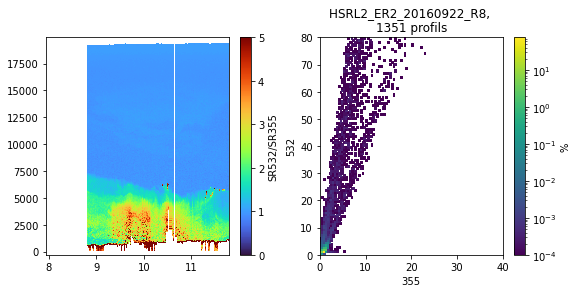

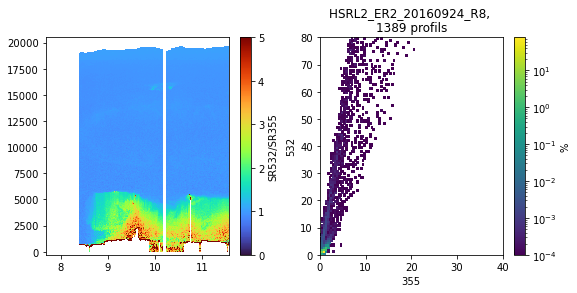

In [52]:
ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*R8.h5'))
allsr355_Nan = None 
allsr532_Nan = None 
# fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

# for filepath, (i,ax) in zip(ER2_LISTFILES, enumerate(axs.flat)):
for filepath in ER2_LISTFILES:
    print(filepath)
    DataProducts = xr.open_dataset(filepath, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values

    data_outside = get_data_AboveBelow_cloud_top_height(filepath.name, cloud_top_height, 'outside')
#     sr355_above = (data_above['calibrated']/data_above['molecular']).sel(wavelength=355).where(data_above.mask_cth!=1)
#     sr532_above = (data_above['calibrated']/data_above['molecular']).sel(wavelength=532).where(data_above.mask_cth!=1)
    sr355_all = (data_outside['calibrated']/data_outside['molecular']).sel(wavelength=355)
    sr532_all = (data_outside['calibrated']/data_outside['molecular']).sel(wavelength=532)
    sr355 = sr355_all.values#np.concatenate([sr355_above, sr355_all], axis=1)
    sr532 = sr532_all.values#np.concatenate([sr532_above, sr532_all], axis=1)
    
    figs, (ax0, ax) = plt.subplots(ncols=2, figsize=(9,4))
    pcm = ax0.pcolormesh(data_outside.time.values, data_outside.altitude.values, (sr532/sr355).T, vmin=0, vmax=5, cmap='turbo')
    plt.colorbar(pcm, ax=ax0, label='SR532/SR355')
    xxegde , yyegde, counts, _ = get_params_histogram([[0,40],[0,80]], sr355.ravel(), sr532.ravel())
    petit = ax.pcolormesh(xxegde, yyegde, counts.T, norm=LogNorm(vmin=1e-4))
    colorpetit = plt.colorbar(petit, ax=ax, label='%')
    ax.set(xlabel='355', ylabel='532', title=f'{filepath.stem}, \n{sr355.shape[0]} profils')


    if (allsr355_Nan is None) | (allsr532_Nan is None) :
        allsr355_Nan = sr355.ravel()
        allsr532_Nan = sr532.ravel()
    else: 
        allsr355_Nan = np.concatenate([allsr355_Nan, sr355.ravel()])
        allsr532_Nan = np.concatenate([allsr532_Nan, sr532.ravel()])

In [155]:
# cloud_allsr355 = None
cloud_allsr532 = None
allclouds = []
allsr355 = None
allsr532 = None
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*20160920_R8.h5')):
    print(er2path)
    # cloud_top_height
    #-----------------
    DataProducts = xr.open_dataset(er2path, group = 'DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values
    print(cloud_top_height[~np.isnan(cloud_top_height)])
    
    print(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
    data = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
    # convert time format to YYYYMMDD HH.HHH
    #---------------------------------------
#     convert_timelist = convert_gpstime(data.time.values, er2path.stem.split('_')[2], convert=False)
#     data = data.assign_coords(time = convert_timelist)
    sr = data['calibrated']/data['molecular']
    
    
#     allclouds.append(data['time'].values[cloud_top_height])


    # remove elements under land elevation
    #-------------------------------------
    DEM_altitude = xr.open_dataset(er2path, group='UserInput')['DEM_altitude'].values
    mat_alt = np.array([data['altitude'].values]*len(data['time'].values))
    print(mat_alt.shape, cloud_top_height.shape)
#     idx_z = mat_alt[np.where(~np.isnan(cloud_top_height))[0],:] > (cloud_top_height[~np.isnan(cloud_top_height)].reshape(-1,1)+100)
    idx_z = mat_alt > cloud_top_height
    print(idx_z, idx_z.shape)
    sr355 = sr.sel(wavelength=355).values#[idx_z].isel(time=cloud_top_height)
    sr532 = sr.sel(wavelength=532).values#[idx_z].isel(time=cloud_top_height)

#     if (cloud_allsr355 is None) | (cloud_allsr532 is None) :
#         cloud_allsr355 = sr355
#         cloud_allsr532 = sr532
#     else:
#         cloud_allsr355 = np.concatenate((cloud_allsr355, sr355))
#         cloud_allsr532 = np.concatenate((cloud_allsr532, sr532))
#     if (allsr355 is None) | (allsr532 is None):
#         allsr355 = sr355[]
#         allsr532 = sr.sel(wavelength = 532)
#     else:
#         allsr355 = xr.concat([allsr355, sr.sel(wavelength = 355)], dim='time')
#         allsr532 = xr.concat([allsr532, sr.sel(wavelength = 532)], dim='time')

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
[239.6256 269.6048 239.6256 ... 374.532  359.5424 374.532 ]
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160920_R8.h5
(2479, 1392) (2479, 1)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] (2479, 1392)


In [66]:
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*20160924_R8.h5'))[:3]:
    print(er2path)
#     # cloud_top_height
#     #-----------------
#     DataProducts = xr.open_dataset(er2path, group = 'DataProducts')
#     cloud_top_height = DataProducts['cloud_top_height'].values
#     print(cloud_top_height[~np.isnan(cloud_top_height)])
    
#     print(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
#     data = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
#     
    
#     mat_alt = np.array([data['altitude'].values]*len(data['time'].values))
#     maskarr = np.where(mat_alt>(cloud_top_height+100), mat_alt, 1)
#     sr.coords['mask_cth'] = (('time','altitude'), maskarr)
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values
    data_above = get_data_AboveBelow_cloud_top_height(er2path.name, cloud_top_height, 'any')
    sr_above = data_above['calibrated']/data_above['molecular']
    sr355 = sr_above.sel(wavelength=355).where(data_above.mask_cth==1, drop=False)
    sr532 = sr_above.sel(wavelength=532).where(data_above.mask_cth==1, drop=False)
    sr_mask = sr_above.where((sr532/sr355 > 6)&(sr532>60)&~np.isnan(cloud_top_height), drop=True)
    print(sr_mask)

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5
<xarray.DataArray (wavelength: 2, time: 1306, altitude: 49)>
array([[[         nan,  19.80405227,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,  11.31713862, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan, 125.89543205,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
   

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
fraction: 37.03703703703704
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
fraction: 40.0
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
fraction: 97.30458221024259
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
fraction: 98.74804381846636
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
fraction: 99.63942307692308
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
fraction: 100.0
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
fraction: 99.93527508090615
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
fraction: 99.45175438596492
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5
fraction: 99.90089197224975


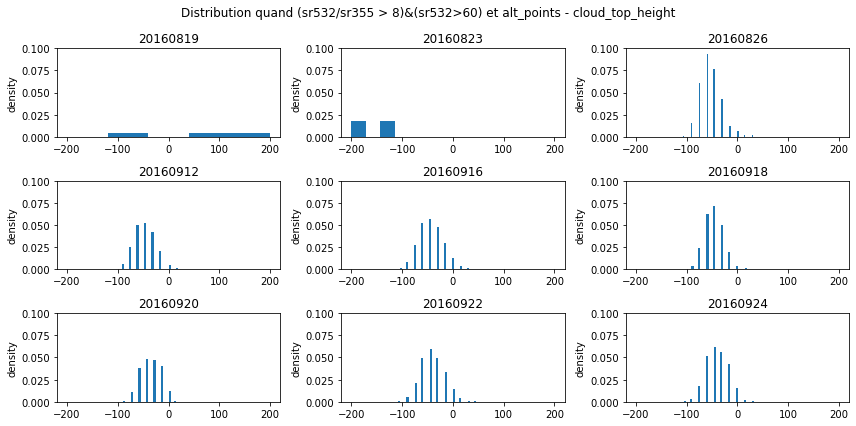

In [134]:
-

<IPython.core.display.Javascript object>


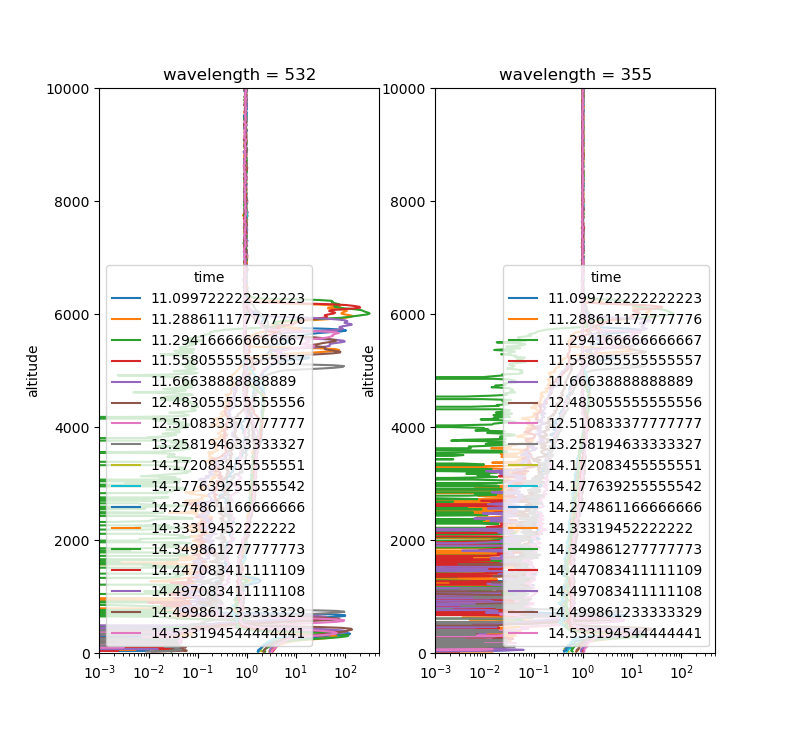

In [198]:
ix, iy = np.where(~np.isnan(sr_mask.sel(wavelength=355).values))#, sr_mask.sel(wavelength=355).where(sr_mask.mask_cth !=1)
print(ix, iy)

fig, (ax,ax2) = plt.subplots(ncols=2)
sr_above.sel(wavelength=532).isel(time=np.unique(ix)).plot.line(y='altitude', ax=ax, xscale='log', xlim=(1e-3,5e2), ylim=(0,10000))
plt.xscale('log')
sr_above.sel(wavelength=355).isel(time=np.unique(ix)).plot.line(y='altitude', ax=ax2, xscale='log', xlim=(1e-3,5e2), ylim=(0,10000))
plt.xscale('log')

<IPython.core.display.Javascript object>


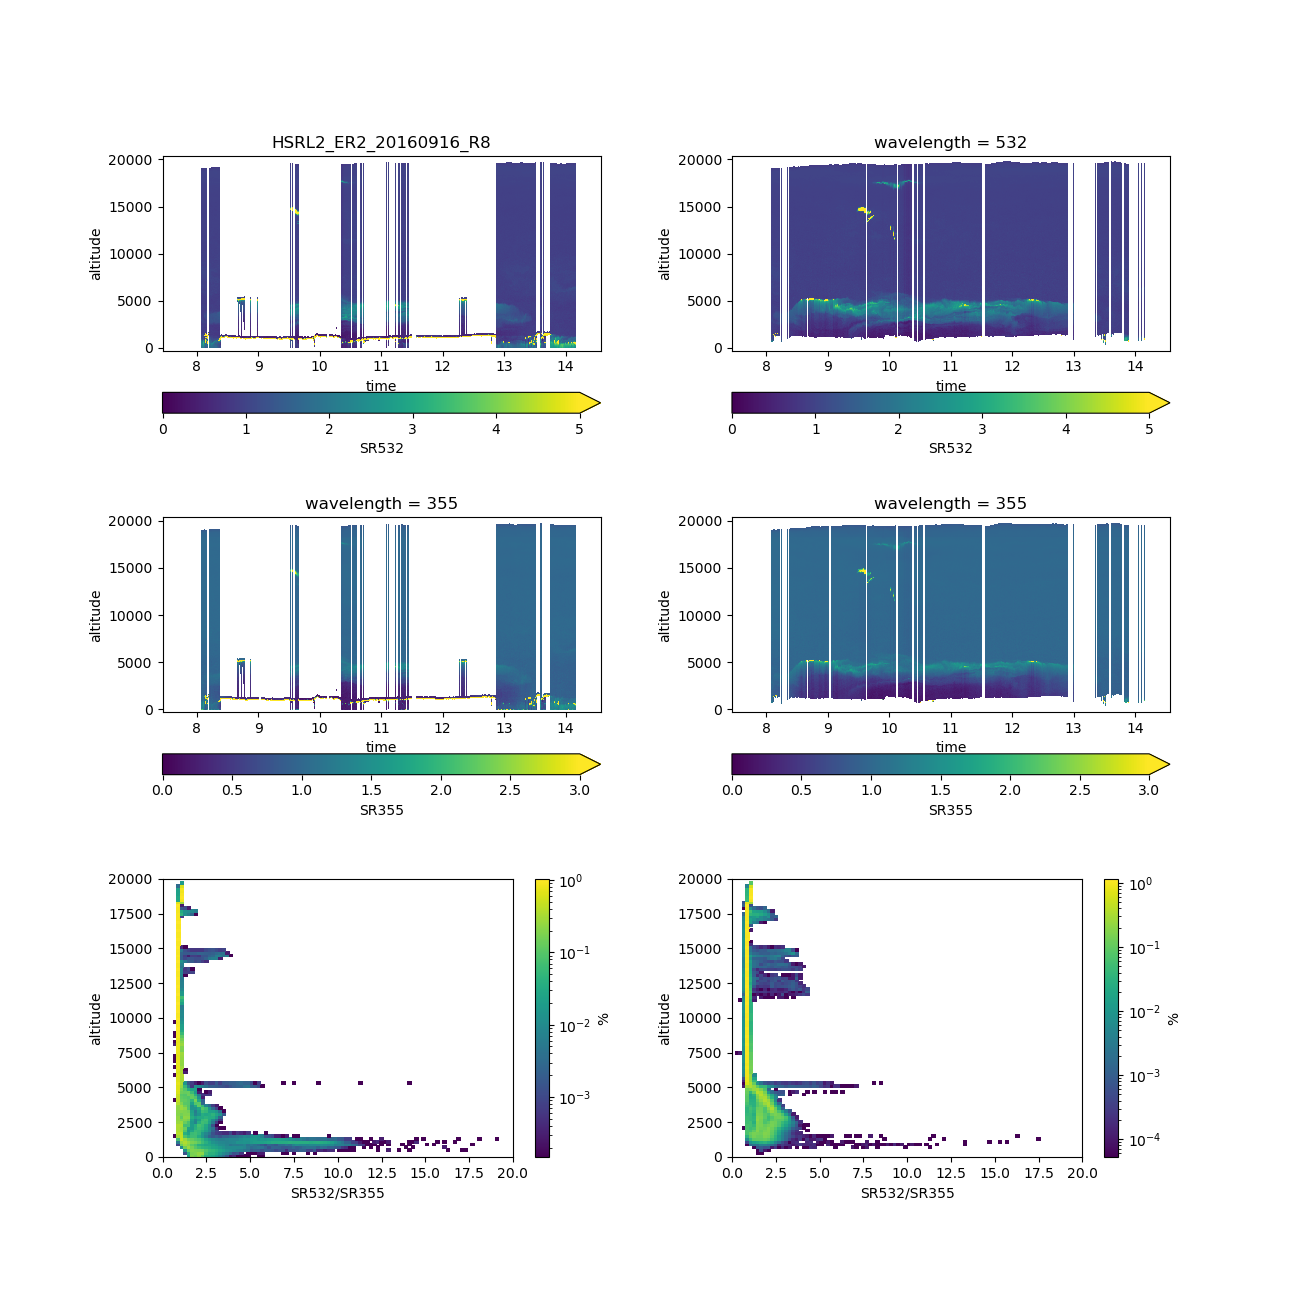

1
2
3
4
5
[ 315815  315816  315817 ... 3315058 3315059 3315060] [      0       1       2 ... 3519205 3519206 3519207]
A
[-2374.26554526 12313.75494469] [[ 52.4631038  -63.20942783]
 [-63.20942783 118.10952614]]
nombre de points no-NaN: 675397
6
[ 322752  322753  322754 ... 3312301 3312302 3312303] [      0       1       2 ... 3519205 3519206 3519207]
A
[-6840.33652531 18244.31768268] [[ 53.97968836 -61.62849513]
 [-61.62849513  80.31052792]]
nombre de points no-NaN: 1901468


[Text(0.5, 0, 'SR532/SR355'), Text(0, 0.5, 'altitude')]

In [86]:
# fig, (ax,ax2) = plt.subplots(nrows=2)
# sr.sel(wavelength=532).where(sr.mask_cth == 1).plot(y='altitude', x='time', vmin=0, vmax=5, ax=ax)
# sr.sel(wavelength=355).where(sr.mask_cth == 1).plot(y='altitude', x='time', vmin=0, vmax=3, ax=ax2)
from matplotlib.gridspec import GridSpec
fig =plt.figure(figsize=(13,13))
gs = GridSpec(nrows=3, 
    ncols=2, 
    figure=fig, 
    width_ratios= [1, 1],
    height_ratios=[1,1,1],
    wspace=0.3,
    hspace=0.3)

Ylim = (0,20000)
print('1')
ax1 = fig.add_subplot(gs[0, 0])
sr.sel(wavelength=532).where(sr.mask_cth == 1).plot(y='altitude', x='time', vmin=0, vmax=5, ax=ax1, 
                                                   cbar_kwargs={'label':'SR532', 'orientation':'horizontal'})
ax1.set(title=f'{er2path.stem}')
print('2')
ax2 = fig.add_subplot(gs[1, 0])
sr.sel(wavelength=355).where(sr.mask_cth == 1).plot(y='altitude', x='time', vmin=0, vmax=3, ax=ax2, 
                                                   cbar_kwargs={'label':'SR355', 'orientation':'horizontal'})

print('3')
ax3 = fig.add_subplot(gs[0, 1])
sr.sel(wavelength=532).where(sr.mask_cth != 1).plot(y='altitude', x='time', vmin=0, vmax=5, ax=ax3, 
                                                   cbar_kwargs={'label':'SR532', 'orientation':'horizontal'})
print('4')
ax4 = fig.add_subplot(gs[1, 1])
sr.sel(wavelength=355).where(sr.mask_cth != 1).plot(y='altitude', x='time', vmin=0, vmax=3, ax=ax4, 
                                                   cbar_kwargs={'label':'SR355', 'orientation':'horizontal'})
from matplotlib.colors import LogNorm
print('5')
ax5 = fig.add_subplot(gs[2, 0])
Xxedges, Yyedges, Hcounts, _= get_params_histogram([[0,20],[0,20000]], 
                                                   (sr.sel(wavelength=532).where(sr.mask_cth == 1)/sr.sel(wavelength=355).where(sr.mask_cth == 1)).values.ravel(),
                                                   np.tile(sr['altitude'].values,len(sr['time'].values)))
p = ax5.pcolormesh(Xxedges, Yyedges, Hcounts.T, norm=LogNorm())
c = plt.colorbar(p, ax=ax5, label='%')
ax5.set(xlabel='SR532/SR355', ylabel='altitude')
# ax5.scatter(sr.sel(wavelength=532).where(sr.mask_cth == 1)/sr.sel(wavelength=355).where(sr.mask_cth == 1), np.tile(sr['altitude'].values,len(sr['time'].values)))

print('6')
ax6 = fig.add_subplot(gs[2, 1])
Xxedges, Yyedges, Hcounts, _= get_params_histogram([[0,20],[0,20000]], 
                                                   (sr.sel(wavelength=532).where(sr.mask_cth != 1)/sr.sel(wavelength=355).where(sr.mask_cth != 1)).values.ravel(),
                                                   np.tile(sr['altitude'].values,len(sr['time'].values)))
p = ax6.pcolormesh(Xxedges, Yyedges, Hcounts.T, norm=LogNorm())
c = plt.colorbar(p, ax=ax6, label='%')
ax6.set(xlabel='SR532/SR355', ylabel='altitude')

In [48]:
Ylim = (0,7000)
ts = find_nearest_index(data['time'].values, 12)
cth, ts = cloud_top_height[ts], sr['time'].values[ts]

fig =plt.figure(figsize=(13,6))
gs = GridSpec(nrows=1, 
    ncols=3, 
    figure=fig, 
    width_ratios= [1, 1, 1],
    height_ratios=[1],
    wspace=0.3,
    hspace=0.3)

print('1')
ax1 = fig.add_subplot(gs[0, 0])
sr.sel(wavelength=355).sel(time=ts).plot(y='altitude', color='b', label=355, xscale='log', ax=ax1)
sr.sel(wavelength=532).sel(time=ts).plot(y='altitude', color='g', label=532, xscale='log', ax=ax1)
ax1.legend(loc='best')
ax1.set(xlabel='SR', title=f'{round(ts,3)}H full profile')
ax1.set_ylim(Ylim)
ax1.set_xlim(0,300)
ax11 = ax1.twiny()
(sr.sel(wavelength=532)/sr.sel(wavelength=355)).sel(time=ts).plot(y='altitude', color='k', ax=ax11)
ax11.set(xlabel='SR532/SR355', title=' ')
ax11.set_ylim(Ylim)

print('2')
ax2 = fig.add_subplot(gs[0, 1])
sr.sel(wavelength=355).where(sr.mask_cth == 1).sel(time=ts).plot(y='altitude', color='b', label=355, xscale='log', ax=ax2)
sr.sel(wavelength=532).where(sr.mask_cth == 1).sel(time=ts).plot(y='altitude', color='g', label=532, xscale='log', ax=ax2)
ax2.legend(loc='best')
ax2.set(xlabel='SR', title=f'{round(ts,3)}H below cloud-top-heigth={cth}')
ax2.set_ylim(Ylim)
ax2.set_xlim(0,300)
ax21 = ax2.twiny()
(sr.sel(wavelength=532).where(sr.mask_cth == 1)/sr.sel(wavelength=355).where(sr.mask_cth == 1)).sel(time=ts).plot(y='altitude', color='k', ax=ax21)
ax21.set(xlabel='SR532/SR355', title=' ')
ax21.set_ylim(Ylim)
# ax2.set_xlim(0,8)

print('3')
ax3 = fig.add_subplot(gs[0, 2])
sr.sel(wavelength=355).where(sr.mask_cth != 1).sel(time=ts).plot(y='altitude', color='b', label=355, xscale='log', ax=ax3)
sr.sel(wavelength=532).where(sr.mask_cth != 1).sel(time=ts).plot(y='altitude', color='g', label=532, xscale='log', ax=ax3)
ax3.legend(loc='best')
ax3.set_ylim(Ylim)
ax3.set(xlabel='SR', title=f'{round(ts,3)}H above cloud-top-heigth={cth}')
ax3.set_xlim(0,300)
ax31 = ax3.twiny()
(sr.sel(wavelength=532).where(sr.mask_cth != 1)/sr.sel(wavelength=355).where(sr.mask_cth != 1)).sel(time=ts).plot(y='altitude', color='k', ax=ax31)
ax31.set(xlabel='SR532/SR355', title=' ')
ax31.set_ylim(Ylim)
# print('4')
# ax4 = fig.add_subplot(gs[:, 3])  
# (sr.sel(wavelength=532).where(sr.mask_cth != 1)/sr.sel(wavelength=355).where(sr.mask_cth != 1)).sel(time=ts).plot(y='altitude', color='k', ax=ax4)
# ax4.set(xlabel='SR532/SR355', title=' ')
# ax4.set_ylim(Ylim)
# ax4.set_xlim(0,8)
# # ax5 = fig.add_subplot(gs[:, 4])                                                 

NameError: name 'find_nearest_index' is not defined

### découvrir les nuages 

In [18]:
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
37.03703703703704
[array([484, 529, 530, 537, 538, 540, 545, 546, 547, 548, 549, 550, 554,
       555, 655, 678, 714])]


<ipython-input-133-c9784b4f0925>:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim(0,100)


/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
40.0
[array([755, 869, 973])]


<ipython-input-133-c9784b4f0925>:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim(0,100)
/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


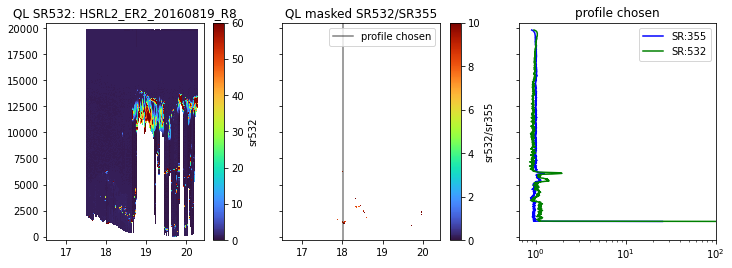

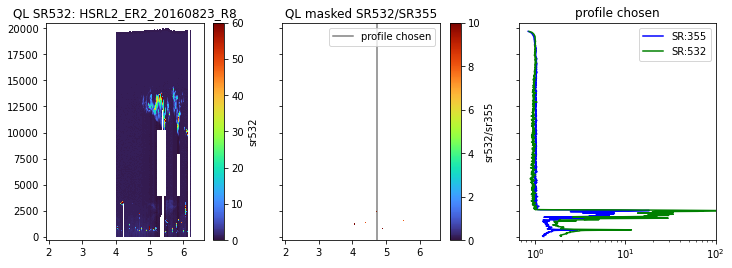

In [133]:
# %matplotlib notebook
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5'))[:2]:
    print(er2path)
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    aot_hi_532 = DataProducts['532_AOT_hi_col'].values
    aot_hi_355 = DataProducts['355_AOT_hi_col'].values
    cloud_top_height = DataProducts['cloud_top_height'].values
    data_above = get_data_AboveBelow_cloud_top_height(er2path.name, cloud_top_height, 'any')
    sr_above = data_above['calibrated']/data_above['molecular']
    sr355 = sr_above.sel(wavelength=355).values
    sr532 = sr_above.sel(wavelength=532).values
    bugs_sr = np.unique(np.where((sr532/sr355 > 8)&(sr532 > 60))[0])
    mask_sr = np.where((sr532/sr355 > 8)&(sr532 > 60), sr532/sr355, np.nan)
    clouds_appear = np.unique(np.where(~np.isnan(cloud_top_height.reshape(-1,1)))[0])
    print(len(np.intersect1d(bugs_sr, clouds_appear))*100/len(bugs_sr))
    diff = np.setdiff1d(bugs_sr, clouds_appear)
    print([np.setdiff1d(bugs_sr, clouds_appear)])
    
    fig, (ax0, ax, ax3) = plt.subplots(ncols=3, figsize=(12,4), sharey=True)
    # sr_above.isel(wavelength=0, time=bugs_sr[20]).plot(y='altitude', label='355', color='b', ax=ax)
    # sr_above.isel(wavelength=0, time=bugs_sr[20]).plot(y='altitude', label='532', color='g', ax=ax)
    pcm = ax0.pcolormesh(sr_above.time.values, sr_above.altitude.values, sr532.T, cmap='turbo', vmin=0, vmax=60)
    plt.colorbar(pcm, ax=ax0, label='sr532')
    pcm = ax.pcolormesh(sr_above.time.values, sr_above.altitude.values, mask_sr.T, cmap='turbo', vmin=0, vmax=10)
#     ax.scatter(sr_above.time.values, cloud_top_height, marker='.', color='k')
    ax.axvline(sr_above.time.values[diff[2]], color='k', label='profile chosen', alpha=0.5)
    plt.colorbar(pcm, ax=ax, label='sr532/sr355')
    ax.legend()
    ax0.set(title=f'QL SR532: {er2path.stem}')
    ax.set(title=f'QL masked SR532/SR355')
    
    ax3.semilogx(sr355[diff[2],:], sr_above.altitude.values, color='b',label='SR:355')
    ax3.semilogx(sr532[diff[2],:], sr_above.altitude.values, color='g',label='SR:532')
    ax3.axhline(cloud_top_height[diff[2]], color='k')
    ax3.legend(loc='best')
    ax3.set_xlim(0,100)
    ax3.set(title='profile chosen')

### Total Depolarization ratio

In [2]:
def remove_NaN_Inf_values(arrayX, arrayY):
    idsX = np.where(~np.isnan(arrayX)&~np.isinf(arrayX))[0]
    idsY = np.where(~np.isnan(arrayY)&~np.isinf(arrayY))[0]
    print(idsX, idsY)
    mask = np.intersect1d(idsX, idsY)
    return mask

dep_532= None
dep_355 = None
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('HSRL2_ER2*_R8.h5')):
    print(er2path)
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')
#     time = Nav_Data['gps_time'][:]#.values.flatten() phony_dim_7: 1404
#     time_convert = pd.to_datetime(convert_gpstime(time.values.flatten(), er2path.stem.split("_")[2]))
#     print(DataProducts['532_bsr'])
    DEM_altitude = xr.open_dataset(er2path, group='UserInput')['DEM_altitude'].values
    mat_alt = np.array([DataProducts['Altitude'].values.ravel()]*len(Nav_Data['gps_time'].values.ravel()))
    idx_z = mat_alt > (DEM_altitude+100)
    arr_alt = mat_alt[idx_z]
    
    if (dep_532 is None) | (dep_355 is None) :
        dep_355 = DataProducts['355_dep'].values[idx_z]
        dep_532 = DataProducts['532_dep'].values[idx_z]
    else:
        dep_355 = np.concatenate([dep_355, DataProducts['355_dep'].values[idx_z]])
        dep_532 = np.concatenate([dep_532, DataProducts['532_dep'].values[idx_z]])

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5


In [12]:
mask1 = remove_NaN_Inf_values(dep_355, dep_532)
print(mask1)
rapportSR = allsr532/allsr355
mask2 = np.where(rapportSR < 5.5)
print(np.union1d(mask1, mask2))

[  539316   539317   539318 ... 28039105 28039106 28039107] [  441632   441633   441634 ... 28039105 28039106 28039107]
[  539316   539317   539318 ... 28039105 28039106 28039107]
[  539316   539317   539318 ... 28039105 28039106 28039107]


In [28]:
masks = np.union1d(mask1, mask2)
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
plt.minorticks_on()
p = ax.scatter(dep_355[masks], dep_532[masks], c=rapportSR[masks], marker='.', vmin=0, vmax=6, cmap='turbo')
# plt.clim(0, 10)
c = plt.colorbar(p, ax=ax, label='SR532/SR355')
ax.set(ylabel='532', xlabel='355', 
       title= f'ER2 - Total depol Ratio,')#\nLinearRegression: {round(slope,5)}x + {round(intercept,3)}
ax.set(xlim=(0,1), ylim=(0,1))
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

In [42]:
DataProducts = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5'), group='DataProducts')
cth = DataProducts['cloud_top_height']
data = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160918_R8.h5'))
sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
print(cth)

# fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(13,6))
# ax.minorticks_on()
# limite_time = data['time'] < 19
# Xxedges, Yyedges, Probas_cloud, _ = get_params_histogram([[0,40], [0,80]], sr355.isel(time=limite_time).values.ravel(), sr532.isel(time=limite_time).values.ravel())
# p = ax.pcolormesh(Xxedges, Yyedges, Probas_cloud.T, norm = LogNorm(vmax=1e0, vmin=1e-5))
# # ax.plot(X532[np.where(~np.isnan(X532))], fitLine2, '-.', c='r')
# c = plt.colorbar(p, ax=ax, label='%')
# ax.set(ylabel='SR532', xlabel='SR355', 
#        title= f'ER2 - HSRL2_ER2_20160819_R8.h5 (<19H)')#\nLinearRegression: {round(slope,5)}x + {round(intercept,3)}
# ax.set(xlim=(-10,40), ylim=(-10,80))
# # ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
# ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

# ax2.minorticks_on()
# limite_time = data['time'] >= 19
# Xxedges, Yyedges, Probas_cloud, _ = get_params_histogram([[0,40], [0,80]], sr355.isel(time=limite_time).values.ravel(), sr532.isel(time=limite_time).values.ravel())
# p2 = ax2.pcolormesh(Xxedges, Yyedges, Probas_cloud.T, norm = LogNorm(vmax=1e0, vmin=1e-5))
# # ax.plot(X532[np.where(~np.isnan(X532))], fitLine2, '-.', c='r')
# c2 = plt.colorbar(p2, ax=ax2, label='%')
# ax2.set(ylabel='SR532', xlabel='SR355', 
#        title= f'ER2 - HSRL2_ER2_20160819_R8.h5 (>=19H)')#\nLinearRegression: {round(slope,5)}x + {round(intercept,3)}
# ax2.set(xlim=(-10,40), ylim=(-10,80))
# # ax2.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
# ax2.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)


<xarray.DataArray 'cloud_top_height' (phony_dim_0: 2856, phony_dim_2: 1)>
array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])
Dimensions without coordinates: phony_dim_0, phony_dim_2
Attributes:
    Unit:               km
    threshold :         1.8
    newthreshold:       96.31991548250775
    minimum range, m:   400.0
    Description:        Cloud Identification and cloud top height
    cloud screen:       active
    ground backoff, m:  100.0
    run date:           24-May-2017 16:23:24
    StandardName:       CldMacro_CTH_Profile_None
    Description2:       None


<Figure size 432x288 with 0 Axes>

### Plots

In [41]:
ER2_DIR = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/')
CALIB_LISTFILES= sorted(ER2_DIR.glob('*_R8.h5'))
OUTPUT_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/profiles/')

In [43]:
file = xr.open_dataset(CALIB_LISTFILES[2])
file['time']
# calibrated_height = file.attrs['calibrated_height']
calibrated_height = [17700, 19000]

In [39]:
print(Path(OUTPUT_PATH, f'{CALIB_LISTFILES[2].stem}_w532w355_{np.around(file.time[1000].values, decimals=3)}_atb_sr.png'))

/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/Profiles/HSRL2_ER2_20160826_R8_w532w355_8.989_atb_sr.png


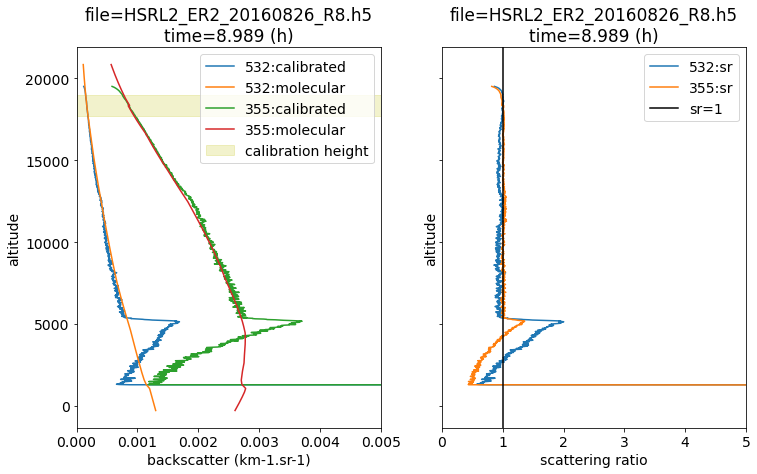

In [47]:
f, (ax, ax2) = plt.subplots(figsize=[12,7], ncols=2, sharey=True)
file.isel(time = 1000, wavelength=1)['calibrated'].plot(y='altitude', label = f'{file["wavelength"][1].values}:calibrated', ax =ax, xlim=(0, 0.005))
file.isel(time = 1000, wavelength=1)['molecular'].plot(y='altitude', label = f'{file["wavelength"][1].values}:molecular', ax=ax, xlim=(0, 0.005))
(file['calibrated']/file['molecular']).isel(time = 1000, wavelength=1).plot(y='altitude', ax=ax2, xlim=(0,5), label = f'{file["wavelength"][1].values}:sr')
ax.axhspan(calibrated_height[0], calibrated_height[1], color='y', alpha=.2, label='calibration height')
# plt.close()
# plt.clf()
file.isel(time = 1000, wavelength=0)['calibrated'].plot(y='altitude', label = f'{file["wavelength"][0].values}:calibrated', ax =ax, xlim=(0, 0.005))
file.isel(time = 1000, wavelength=0)['molecular'].plot(y='altitude', label = f'{file["wavelength"][0].values}:molecular', ax=ax, xlim=(0, 0.005))
(file['calibrated']/file['molecular']).isel(time = 1000, wavelength=0).plot(y='altitude', ax=ax2, xlim=(0,5), label = f'{file["wavelength"][0].values}:sr')
ax2.axvline(1, color='k', label='sr=1')
ax.legend(loc='best')
ax2.legend(loc='best')
ax.set(title=f'file={CALIB_LISTFILES[2].name}\ntime={np.around(file.time[10].values, decimals=3)} (h)', xlabel='backscatter (km-1.sr-1)')
ax2.set(title=f'file={CALIB_LISTFILES[2].name}\ntime={np.around(file.time[10].values, decimals=3)} (h)', xlabel='scattering ratio')
plt.rcParams['font.size'] = '14'
plt.savefig(Path(OUTPUT_PATH, f'{CALIB_LISTFILES[2].stem}_w532w355_{np.around(file.time[1000].values, decimals=3)}_atb_sr.png'))

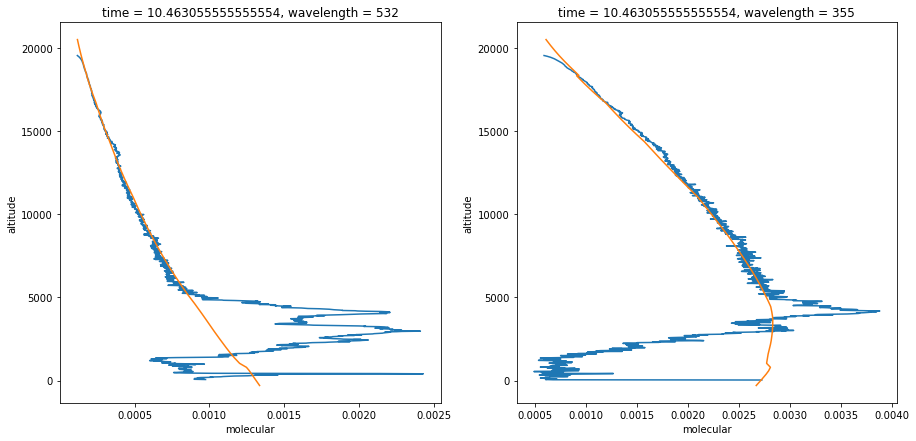

In [66]:
f, ((ax, ax2), (ax3, ax4)) = plt.subplots(figsize=[15,7], ncols=2)
loaded.isel(time = 1000, wavelength=1)['calibrated'].plot(y='altitude', label = 'calibrated', ax =ax)
loaded.isel(time = 1000, wavelength=1)['molecular'].plot(y='altitude', label = 'molecular', ax=ax)

loaded.isel(time = 1000, wavelength=0)['calibrated'].plot(y='altitude', label = 'calibrated', ax =ax2)
loaded.isel(time = 1000, wavelength=0)['molecular'].plot(y='altitude', label = 'molecular', ax=ax2)

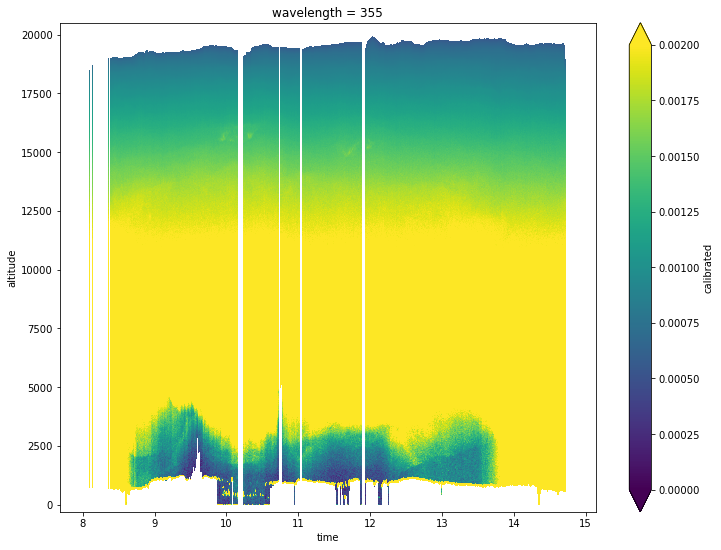

In [67]:
f, ax= plt.subplots(figsize=[12,9])
loaded.isel( wavelength=0)['calibrated'].plot(y='altitude', x='time', vmin = 0, vmax=0.002)


## Optical Thickness Study

<IPython.core.display.Javascript object>


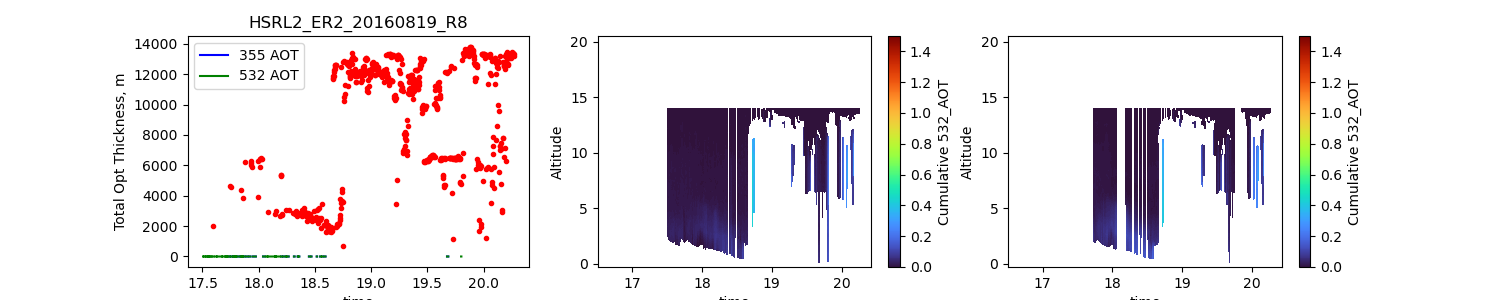

<IPython.core.display.Javascript object>


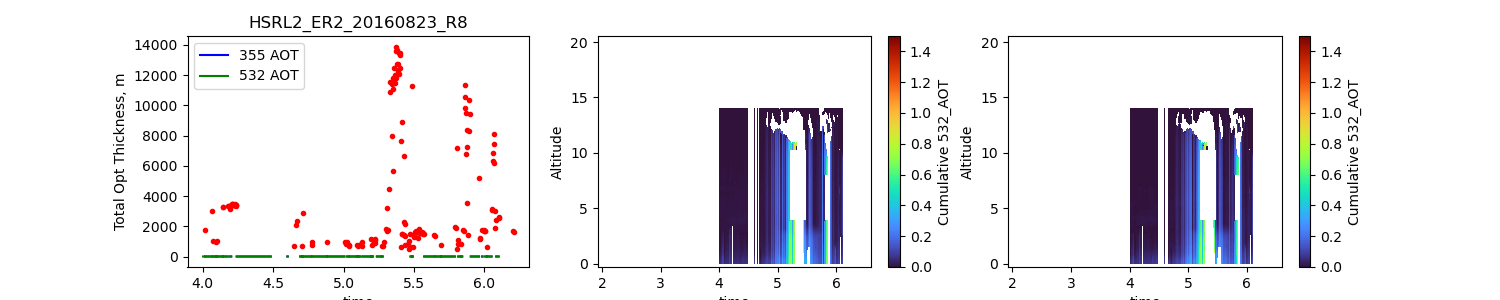

<IPython.core.display.Javascript object>


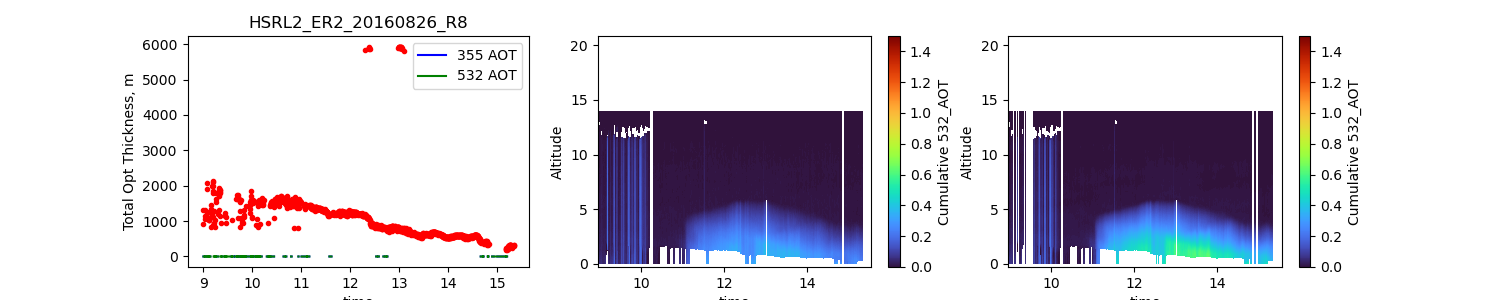

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


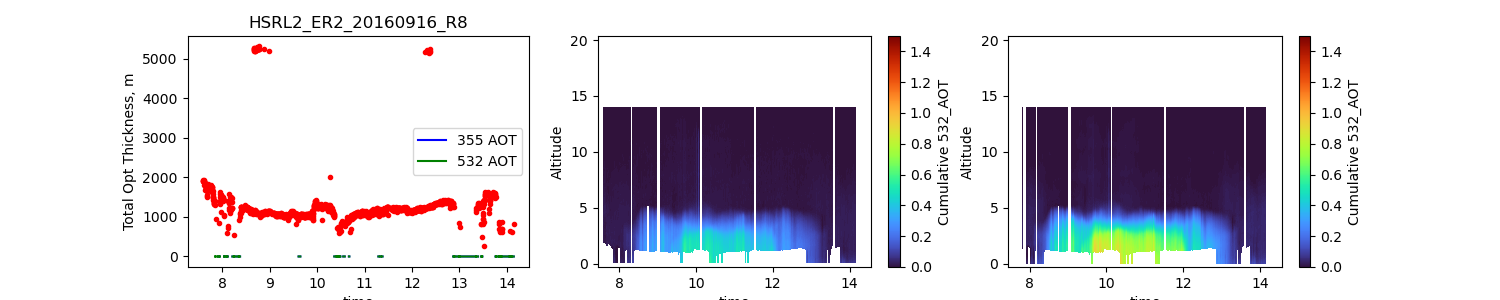

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


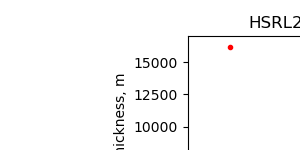

<IPython.core.display.Javascript object>


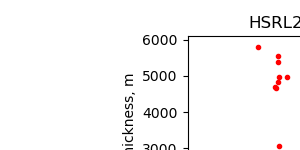

In [25]:
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5')):
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')
    gps_time = Nav_Data['gps_time'].values.ravel()
    Altitude = DataProducts['Altitude'].values.ravel()
    cloud_top_height = DataProducts['cloud_top_height'].values.ravel()
    fig, axs = plt.subplots(ncols=3, figsize=(15,3))
    plt.rcParams['pcolor.shading']='auto'
    axs[0].plot(gps_time, DataProducts['355_AOT_hi'].values, label='355 AOT', color='b')
    axs[0].plot(gps_time, DataProducts['532_AOT_hi'].values, label='532 AOT', color='g')
    axs[0].scatter(gps_time, cloud_top_height, marker='.', color='r')
    axs[0].set(xlabel='time', ylabel='Total Opt Thickness, m', title=f'{er2path.stem}')
    axs[0].legend(loc='best')
    
    pc = axs[1].pcolormesh(gps_time, Altitude/1e3, DataProducts['532_AOT_hi_col'].values.T, cmap='turbo', vmin=0, vmax=1.5)
    axs[1].set(xlabel='time', ylabel='Altitude')
    plt.colorbar(pc, ax=axs[1], orientation='vertical', label='Cumulative 532_AOT')
    axs[1].set_xlim(gps_time[0], gps_time[-1])
    pc = axs[2].pcolormesh(gps_time, Altitude/1e3, DataProducts['355_AOT_hi_col'].values.T, cmap='turbo', vmin=0, vmax=1.5)
    axs[2].set(xlabel='time', ylabel='Altitude')
    plt.colorbar(pc, ax=axs[2], orientation='vertical', label='Cumulative 532_AOT')
    axs[2].set_xlim(gps_time[0], gps_time[-1])

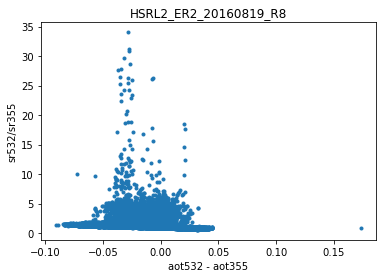

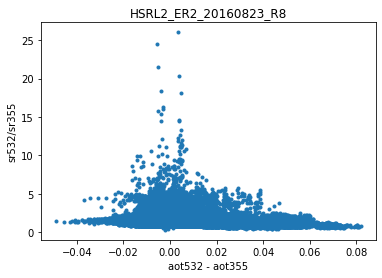

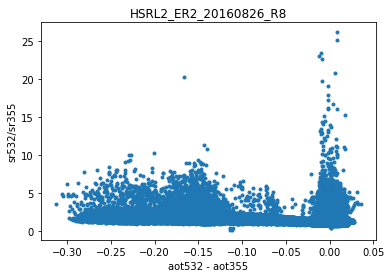

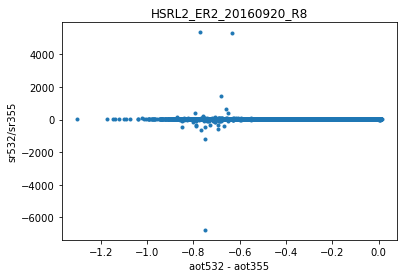

In [14]:
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5')):
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')
    gps_time = Nav_Data['gps_time'].values.ravel()
    Altitude = DataProducts['Altitude'].values.ravel()
    data = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
    diff_aot_hi = DataProducts['532_AOT_hi_col'] - DataProducts['355_AOT_hi_col']
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
    fig, ax = plt.subplots()
    ax.scatter(diff_aot_hi.values.flatten(), (sr532/sr355).values.flatten(), marker='.')
    ax.set(xlabel='aot532 - aot355', ylabel='sr532/sr355', title=f'{er2path.stem}')

In [2]:
allatb355 = None
allatb532 = None 
allsr355 = None
allsr532 = None 
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/').glob('*_R8.h5')):
    data = xr.open_dataset(er2path)
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
    if (allatb355 is None )| (allsr355 is None):
        allatb355 = data['calibrated'].sel(wavelength=355)
        allsr355 = sr355
        
    else:
        allatb355 = xr.concat([allatb355, data['calibrated'].sel(wavelength=355)], dim='time')
        allsr355 = xr.concat([allsr355, sr355], dim='time')

        
    if (allatb532 is None ) | (allsr532 is None):
        allatb532 = data['calibrated'].sel(wavelength=532)
        allsr532 = sr532
    else: 
        allatb532 = xr.concat([allatb532, data['calibrated'].sel(wavelength=355)], dim='time')
        allsr532 = xr.concat([allsr532, sr532], dim='time')
        
    print(er2path)

/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160924_R8.h5


In [3]:
selected_cond = (allsr532/allsr355 > 8) & (allsr532 > 60)
print(np.where(selected_cond))
selected_allsr355 = allsr355.values[(selected_cond)]
selected_allsr532 = allsr532.values[(selected_cond)]
selected_allatb355 = allatb355.values[(selected_cond)]
selected_allatb532 = allatb532.values[(selected_cond)]

(array([  484,   529,   529, ..., 20308, 20309, 20337]), array([132, 112, 439, ...,  75,  75,  72]))


[    0     1     2 ... 21003 21004 21005] [    0     1     2 ... 21003 21004 21005]
A
[ 7.92960388 29.2543596 ] [[ 0.00022147 -0.00405731]
 [-0.00405731  0.09691392]]
nombre de points no-NaN: 21006
[    0     1     2 ... 21003 21004 21005] [    0     1     2 ... 21003 21004 21005]
A
[ 0.98000575 -0.02892981] [[7.03562228e-07 9.61394028e-07]
 [9.61394028e-07 1.35781428e-06]]
nombre de points no-NaN: 21006


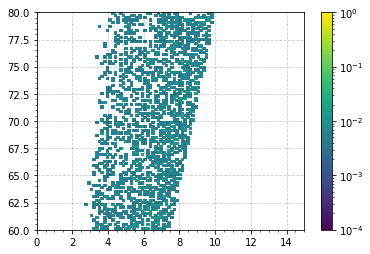

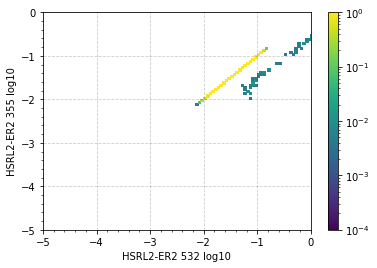

In [6]:
%matplotlib inline
from matplotlib.colors import LogNorm
Xx, Yy, histoSR, _ = get_params_histogram([[0, 15],[60, 80]], selected_allsr355, selected_allsr532)
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-4, vmax=1e0))
plt.colorbar(pcm, ax=ax)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)


Xx, Yy, histoSR, _ = get_params_histogram([[-4,1], [-4,1]], np.log10(selected_allatb532), np.log10(selected_allatb355))
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-4, vmax=1e0))
plt.colorbar(pcm, ax=ax)
ax.set(xlabel='HSRL2-ER2 532 log10', ylabel='HSRL2-ER2 355 log10')
ax.set_xlim(-5.0, 0.0)
ax.set_ylim(-5.0, 0.0)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

In [67]:
Xx, Yy, histoSR, _ = get_params_histogram([[-8,1], [-8,1]], np.log10(allatb532.values.ravel()), np.log10(allatb355.values.ravel()))
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-4, vmax=1e0))
plt.colorbar(pcm, ax=ax)
ax.set(xlabel='HSRL2-ER2 532 log10', ylabel='HSRL2-ER2 355 log10')
ax.set_xlim(-7.0, 0.0)
ax.set_ylim(-7.0, 0.0)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

<ipython-input-67-46ab171c50f8>:1: RuntimeWarning: invalid value encountered in log10
  Xx, Yy, histoSR, _ = get_params_histogram([[-8,1], [-8,1]], np.log10(allatb532.values.ravel()), np.log10(allatb355.values.ravel()))


[  724334   724335   724336 ... 42914981 42914983 42914985] [  887769   887770   887771 ... 42914981 42914983 42914985]
A
[ 0.78230871 -0.58359137] [[7.35478431e-09 2.04949543e-08]
 [2.04949543e-08 5.76701950e-08]]
nombre de points no-NaN: 19832479


In [7]:
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5'))[2:]:
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    alt = DataProducts['Altitude'].values.ravel()
    atb532 = DataProducts['532_total_attn_bsc'].values
    atb355 = DataProducts['355_total_attn_bsc'].values
    data = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
#     print(np.where(np.isclose(atb532, atb355)), np.where((sr532/sr355 > 8) & (sr532 > 60)))
    _, points, _ = np.intersect1d(np.where(np.isclose(atb532, atb355))[0], np.where((sr532/sr355 > 8) & (sr532 > 60))[0], return_indices=True)
    
    where_approxi = np.where(np.isclose(atb532, atb355))
    where_srbugs = np.where((sr532/sr355 > 8) & (sr532 > 60))
    print((points))
    print(np.array(where_approxi[0])[(points).astype(int)], np.array(where_approxi[1])[(points).astype(int)])
    xpoints = np.array(where_approxi[0])[(points).astype(int)]
    ypoints = np.array(where_approxi[1])[(points).astype(int)]
    
#     %matplotlib inline
    fig, (ax, ax2, ax3)=plt.subplots(ncols=3, figsize=(13,4))
    gps_time = xr.open_dataset(er2path, group='Nav_Data')['gps_time'].values.ravel()
    pcm = ax.pcolormesh(gps_time, alt, atb355.T, norm=LogNorm(vmin=1e-4, vmax=1e-1), cmap='turbo')
    plt.colorbar(pcm, ax=ax, label='ATB, km-1,sr-1')
    ax.scatter(gps_time[xpoints], alt[ypoints], marker='.', color='white')
    ax.set(xlabel='time', ylabel='alt', title=f'{er2path.stem}')
    ax.set_ylim(0, 14000)
    ax2.semilogx(atb355[xpoints[0],:], alt, color='b', label='355')
    ax2.semilogx(data['molecular'].isel(time=xpoints[0], wavelength=0).values, alt, color='b', label='355mol', linestyle='--')
    ax2.semilogx(atb532[xpoints[0],:], alt, color='g', label='532')
    ax2.semilogx(data['molecular'].isel(time=xpoints[0], wavelength=1).values, alt, color='g', label='532mol', linestyle='--')
    ax2.axhline(alt[ypoints[0]], linestyle='-.', color='k')
    ax2.legend(loc='best')
    ax2.set_ylim(0, 14000)
    ax2.set(xlabel='ATB, km-1.sr-1', title=f'profile ex: {gps_time[xpoints[0]]}')

    ax3.semilogx(sr355[xpoints[0],:], alt,color='b', label='355')
    ax3.semilogx(sr532[xpoints[0],:], alt,color='g', label='532')
    ax3.axhline(alt[ypoints[0]], linestyle='-.', color='k')
    ax3.legend(loc='best')
    ax3.set_ylim(0, 14000)
    ax3.set(xlabel='SR', title=f'profile ex: {gps_time[xpoints[0]]}')


[2 3]


IndexError: index 2 is out of bounds for axis 0 with size 0

In [112]:
_, points, _ = np.intersect1d(np.where(np.isclose(atb532, atb355))[0], np.where((sr532/sr355 > 8) & (sr532 > 60))[0], return_indices=True)
where_approxi = np.where(np.isclose(atb532, atb355))
where_srbugs = np.where((sr532/sr355 > 8) & (sr532 > 60))
print((points))
print(np.array(where_approxi[0])[(points).astype(int)], np.array(where_approxi[1])[(points).astype(int)])
xpoints = np.array(where_approxi[0])[(points).astype(int)]
ypoints = np.array(where_approxi[1])[(points).astype(int)]

[ 0  7 10]
[ 541 1371 1540] [210 122 203]


[Text(0.5, 0, 'SR'), Text(0.5, 1.0, 'profile ex: 9.18805562222222')]

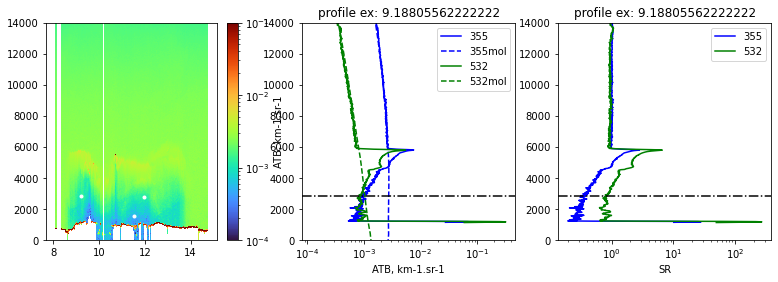

In [123]:
%matplotlib inline
fig, (ax, ax2, ax3)=plt.subplots(ncols=3, figsize=(13,4))
gps_time = xr.open_dataset(er2path, group='Nav_Data')['gps_time'].values.ravel()
pcm = ax.pcolormesh(gps_time, alt, atb355.T, norm=LogNorm(vmin=1e-4, vmax=1e-1), cmap='turbo')
plt.colorbar(pcm, ax=ax, label='ATB, km-1,sr-1')
ax.scatter(gps_time[xpoints], alt[ypoints], marker='.', color='white')
ax.set_ylim(0, 14000)

ax2.semilogx(atb355[xpoints[0],:], alt, color='b', label='355')
ax2.semilogx(data['molecular'].isel(time=xpoints[0], wavelength=0).values, alt, color='b', label='355mol', linestyle='--')
ax2.semilogx(atb532[xpoints[0],:], alt, color='g', label='532')
ax2.semilogx(data['molecular'].isel(time=xpoints[0], wavelength=1).values, alt, color='g', label='532mol', linestyle='--')
ax2.axhline(alt[ypoints[0]], linestyle='-.', color='k')
ax2.legend(loc='best')
ax2.set_ylim(0, 14000)
ax2.set(xlabel='ATB, km-1.sr-1', title=f'profile ex: {gps_time[xpoints[0]]}')

ax3.semilogx(sr355[xpoints[0],:], alt,color='b', label='355')
ax3.semilogx(sr532[xpoints[0],:], alt,color='g', label='532')
ax3.axhline(alt[ypoints[0]], linestyle='-.', color='k')
ax3.legend(loc='best')
ax3.set_ylim(0, 14000)
ax3.set(xlabel='SR', title=f'profile ex: {gps_time[xpoints[0]]}')
